In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("DDoS_Dataset.csv")
df

id  PKT_COUNT  PKT_BYTE  FLOW_COUNT  ICMP_COUNT  ICMP_BYTE  \
0      1.090060   1.059653  0.074315    0.767695    0.767695   0.850798   
1      0.884140   1.003461  0.036255    0.702544    0.702544   0.840327   
2      1.159857   0.907132  0.024437    0.842828    0.842828   0.778821   
3      1.019358   0.998110  0.055443    0.836924    0.836924   0.741723   
4      1.148539   0.904456  0.057539    0.617977    0.617977   0.840132   
...         ...        ...       ...         ...         ...        ...   
27065 -1.372151   1.185417  0.063830    0.000000    0.000000   0.000000   
27066 -1.374339   1.198796  0.040698    0.000000    0.000000   0.000000   
27067 -1.373509   1.040923  0.061798    0.000000    0.000000   0.000000   
27068 -1.373660   1.279070  0.011299    0.000000    0.000000   0.000000   
27069 -1.370491   0.982055  0.065000    0.000000    0.000000   0.000000   

       ICMP_TYPE  UDP_COUNT  UDP_BYTE  TCP_COUNT  TCP_BYTE   TCP_SYN  \
0       0.232305   0.232305       0.0        0.0  0.000000  0.000000   
1       0.297456   0.297456       0.0        0.0  0.000000  0.000000   
2       0.157172   0.157172       0.0        0.0  0.000000  0.000000   
3       0.163076   0.163076       0.0        0.0  0.000000  0.000000   
4       0.382023   0.382023       0.0        0.0  0.000000  0.000000   
...          ...        ...       ...        ...       ...       ...   
27065   0.000000   0.000000       1.0        1.0  0.000000  0.058511   
27066   0.000000   0.000000       1.0        1.0  0.000000  0.000000   
27067   0.000000   0.000000       1.0        1.0  0.011236  0.033708   
27068   0.000000   0.000000       1.0        1.0  0.000000  0.000000   
27069   0.000000   0.000000       1.0        1.0  0.010000  0.075000   

       HTTP_COUNT  HTTP_GET  
0        0.000000         0  
1        0.000000         0  
2        0.000000         0  
3        0.000000         0  
4        0.000000         0  
...           ...       ...  
27065    0.545455         4  
27066    0.000000         4  
27067    0.833333         4  
27068    0.000000         4  
27069    0.600000         4  

[27070 rows x 14 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27070 entries, 0 to 27069
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          27070 non-null  float64
 1   PKT_COUNT   27070 non-null  float64
 2   PKT_BYTE    27070 non-null  float64
 3   FLOW_COUNT  27070 non-null  float64
 4   ICMP_COUNT  27070 non-null  float64
 5   ICMP_BYTE   27070 non-null  float64
 6   ICMP_TYPE   27070 non-null  float64
 7   UDP_COUNT   27070 non-null  float64
 8   UDP_BYTE    27070 non-null  float64
 9   TCP_COUNT   27070 non-null  float64
 10  TCP_BYTE    27070 non-null  float64
 11  TCP_SYN     27070 non-null  float64
 12  HTTP_COUNT  27070 non-null  float64
 13  HTTP_GET    27070 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 3.1 MB


In [15]:
x = df.iloc[:,:-2]
x 

id  PKT_COUNT  PKT_BYTE  FLOW_COUNT  ICMP_COUNT  ICMP_BYTE  \
0      1.090060   1.059653  0.074315    0.767695    0.767695   0.850798   
1      0.884140   1.003461  0.036255    0.702544    0.702544   0.840327   
2      1.159857   0.907132  0.024437    0.842828    0.842828   0.778821   
3      1.019358   0.998110  0.055443    0.836924    0.836924   0.741723   
4      1.148539   0.904456  0.057539    0.617977    0.617977   0.840132   
...         ...        ...       ...         ...         ...        ...   
27065 -1.372151   1.185417  0.063830    0.000000    0.000000   0.000000   
27066 -1.374339   1.198796  0.040698    0.000000    0.000000   0.000000   
27067 -1.373509   1.040923  0.061798    0.000000    0.000000   0.000000   
27068 -1.373660   1.279070  0.011299    0.000000    0.000000   0.000000   
27069 -1.370491   0.982055  0.065000    0.000000    0.000000   0.000000   

       ICMP_TYPE  UDP_COUNT  UDP_BYTE  TCP_COUNT  TCP_BYTE   TCP_SYN  
0       0.232305   0.232305       0.0        0.0  0.000000  0.000000  
1       0.297456   0.297456       0.0        0.0  0.000000  0.000000  
2       0.157172   0.157172       0.0        0.0  0.000000  0.000000  
3       0.163076   0.163076       0.0        0.0  0.000000  0.000000  
4       0.382023   0.382023       0.0        0.0  0.000000  0.000000  
...          ...        ...       ...        ...       ...       ...  
27065   0.000000   0.000000       1.0        1.0  0.000000  0.058511  
27066   0.000000   0.000000       1.0        1.0  0.000000  0.000000  
27067   0.000000   0.000000       1.0        1.0  0.011236  0.033708  
27068   0.000000   0.000000       1.0        1.0  0.000000  0.000000  
27069   0.000000   0.000000       1.0        1.0  0.010000  0.075000  

[27070 rows x 12 columns]

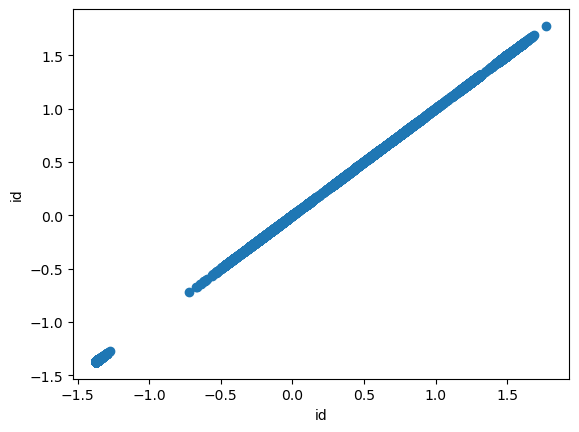

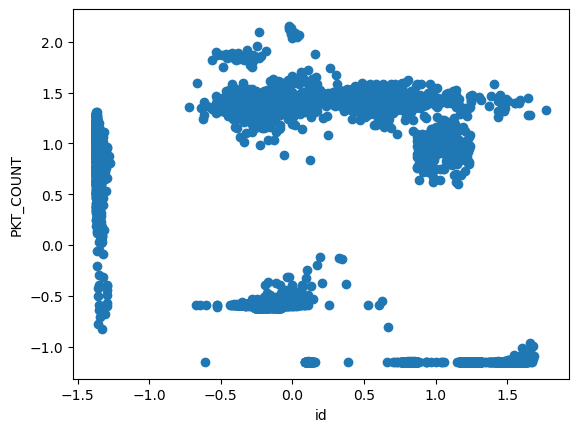

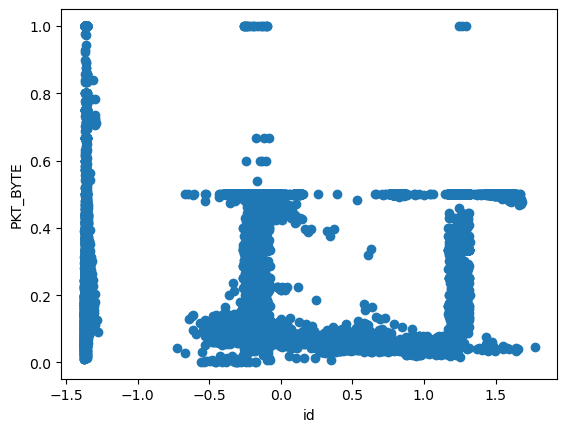

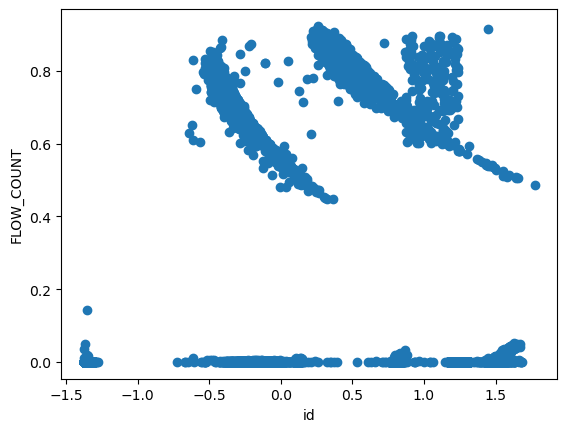

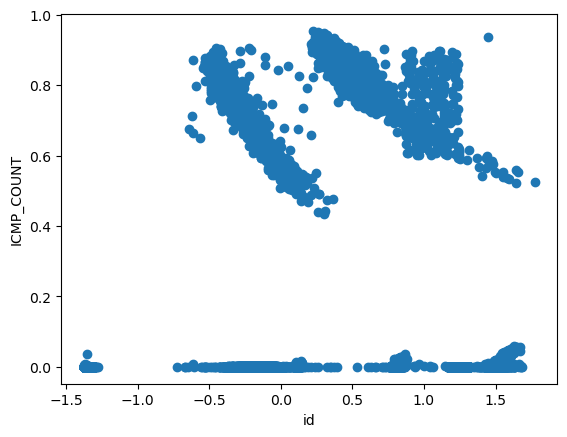

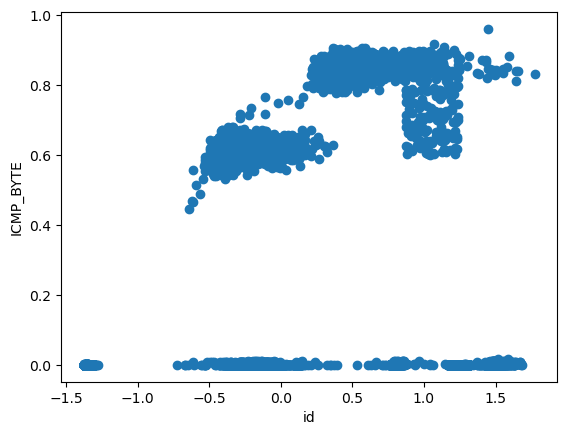

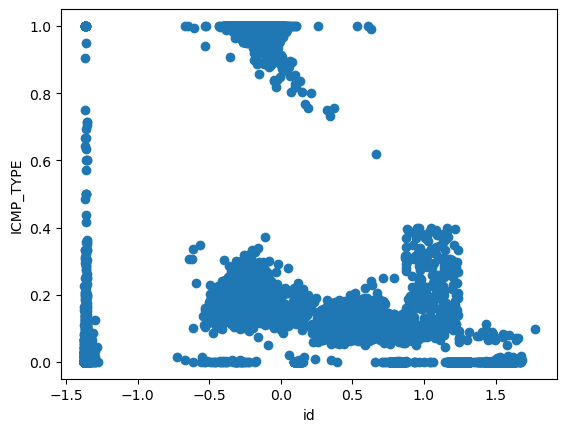

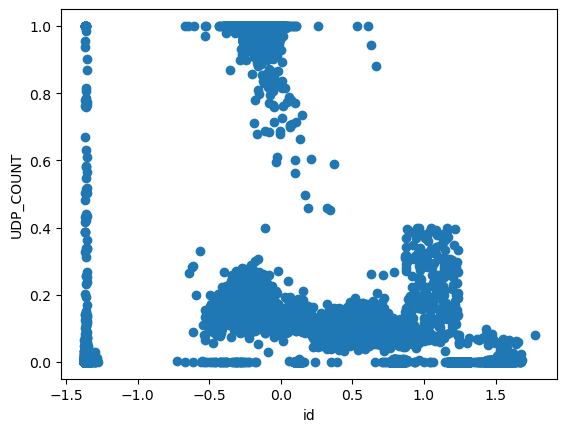

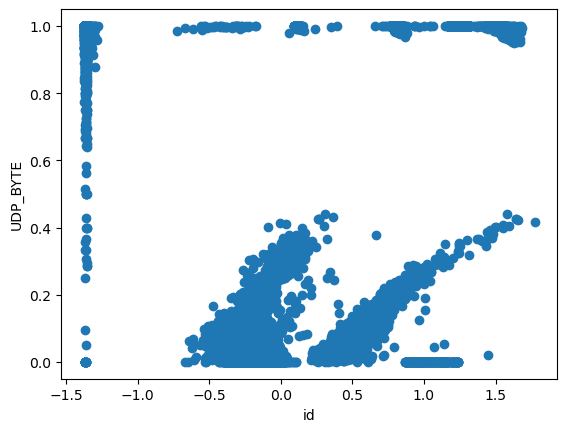

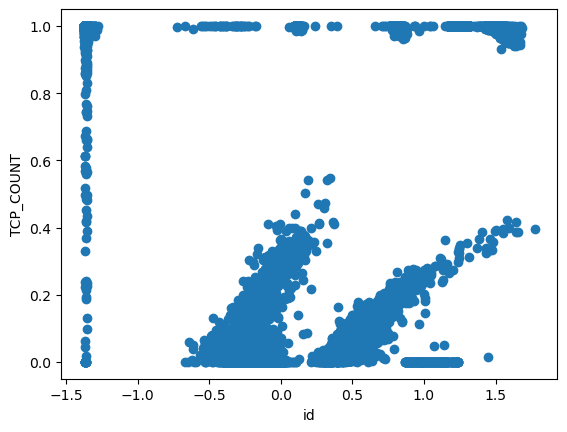

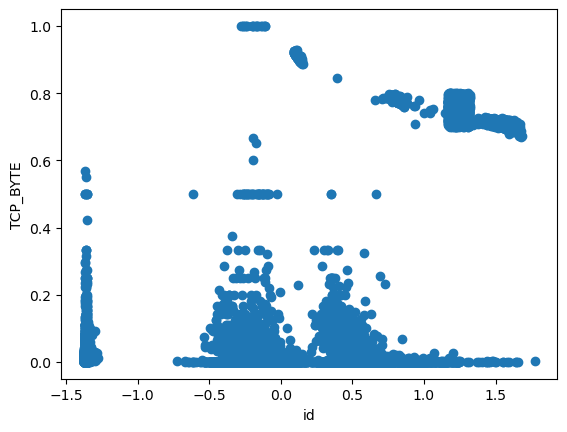

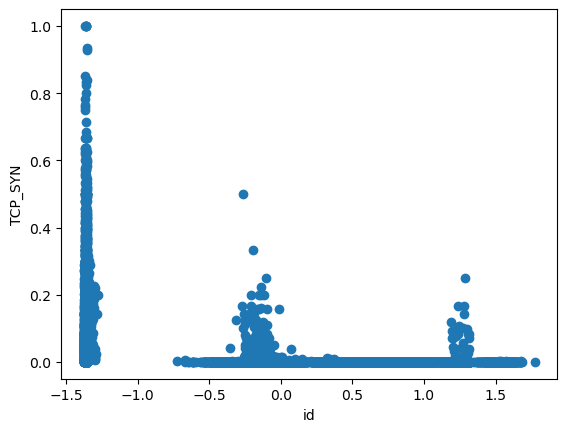

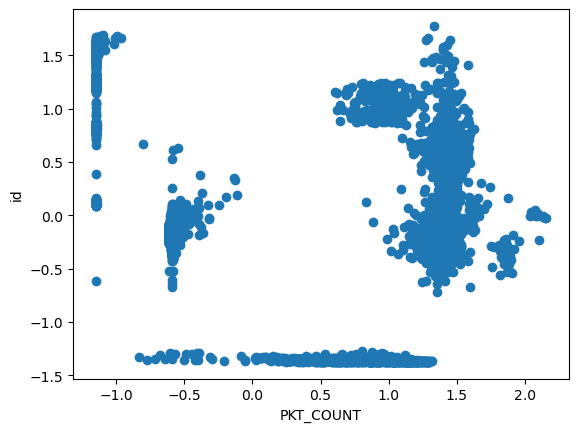

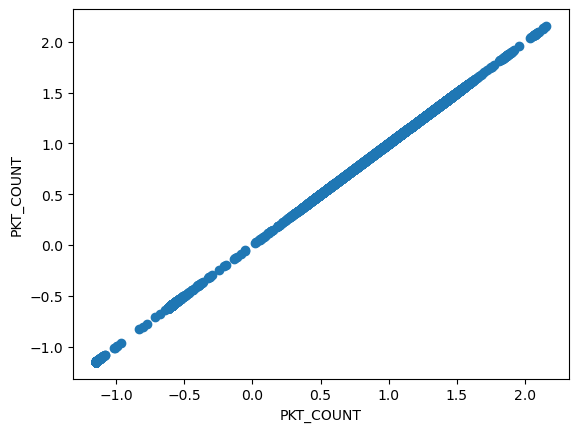

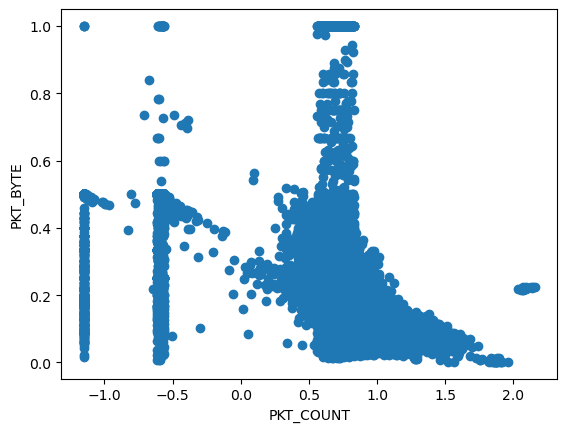

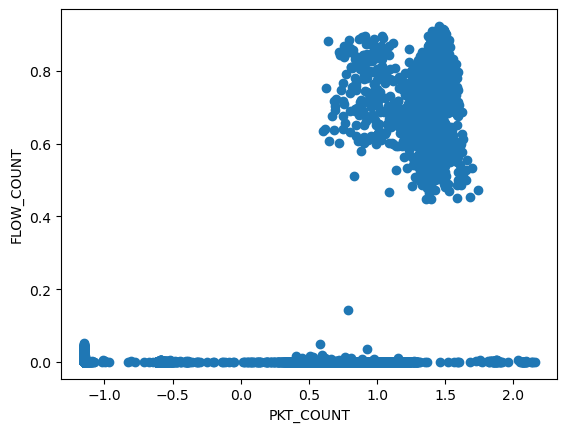

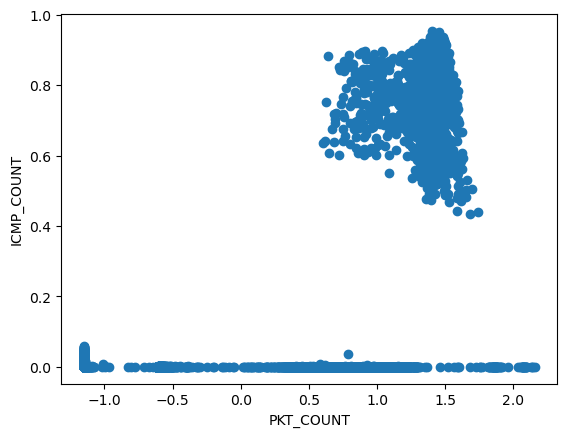

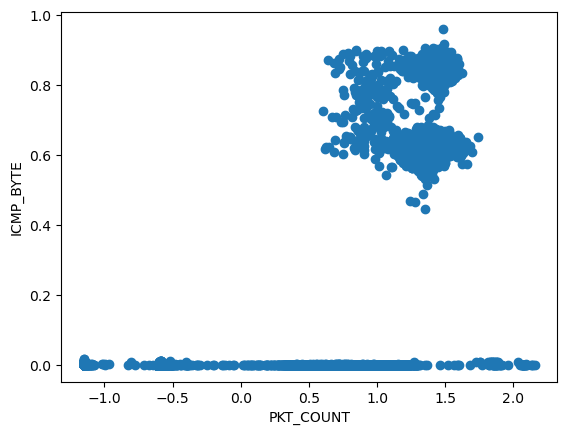

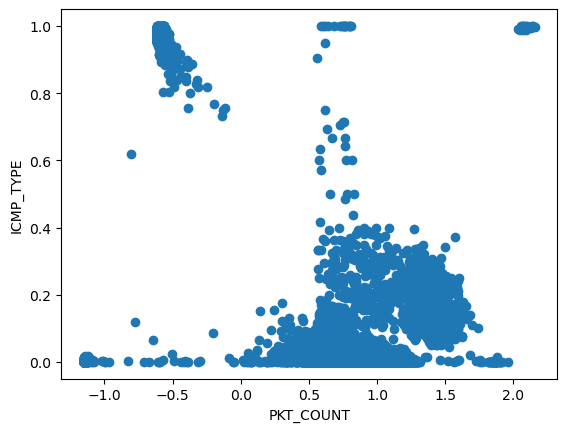

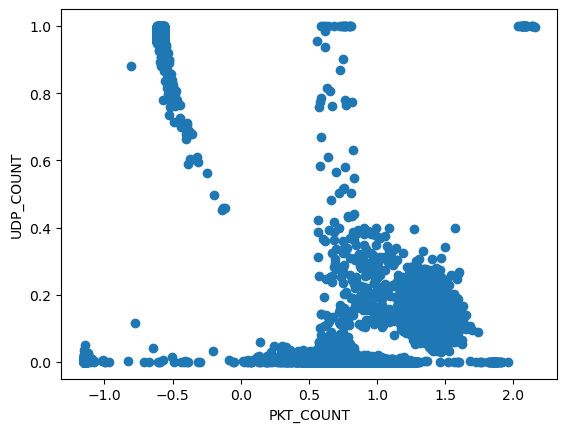

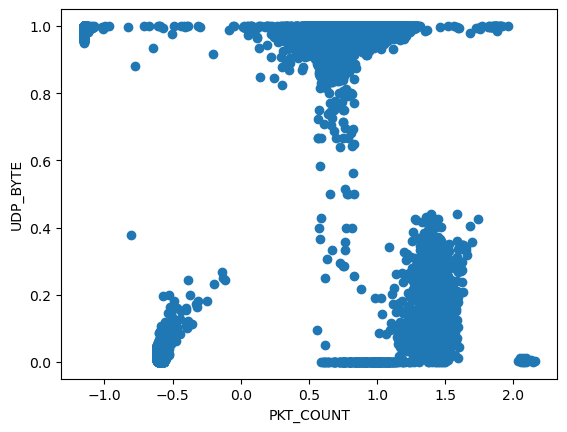

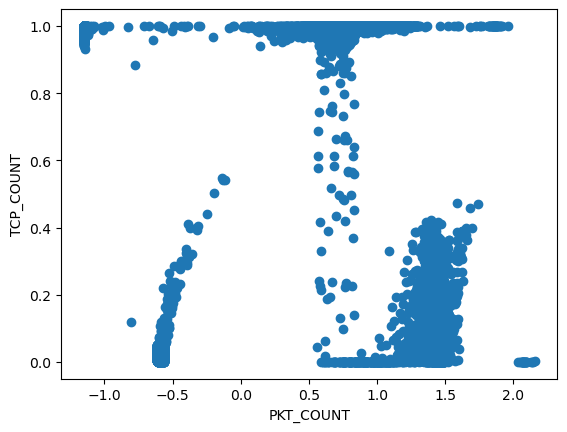

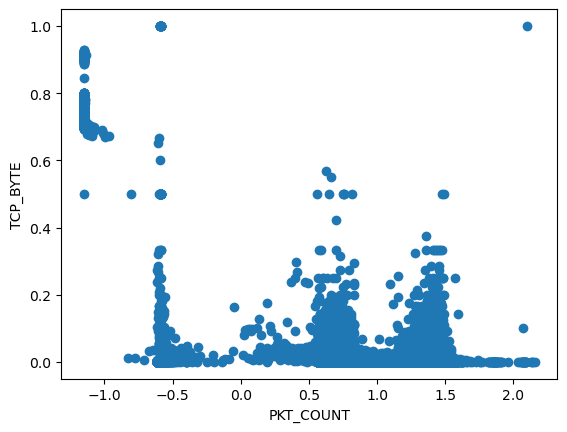

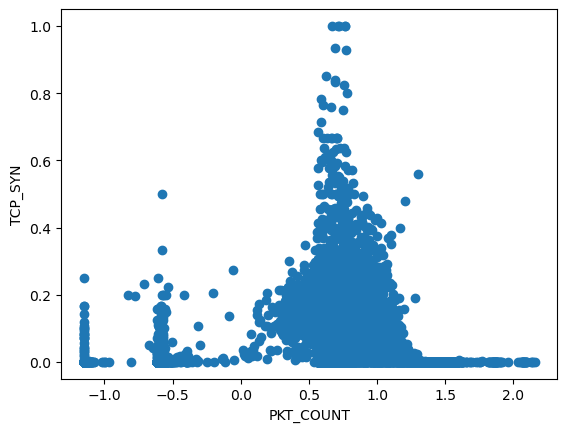

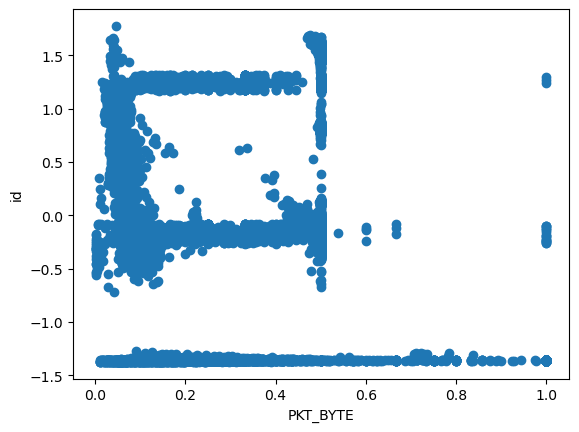

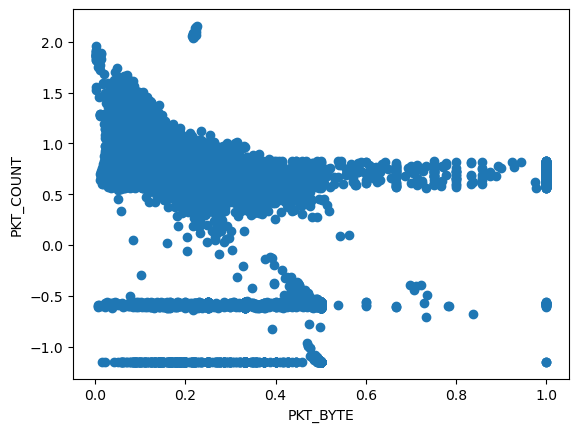

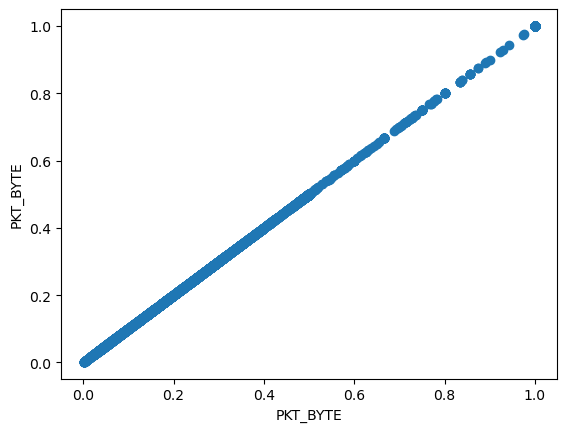

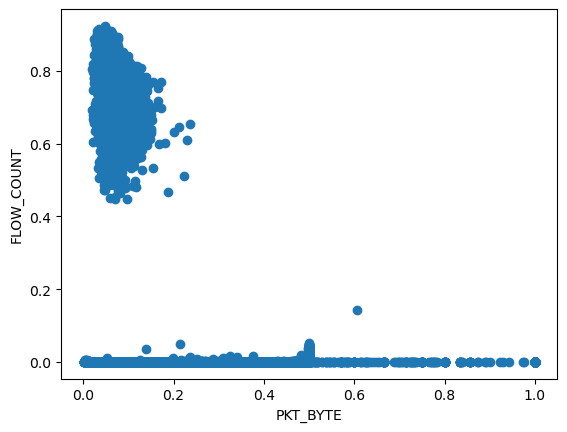

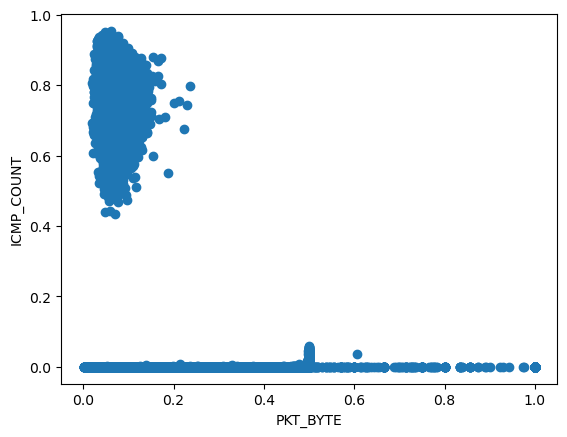

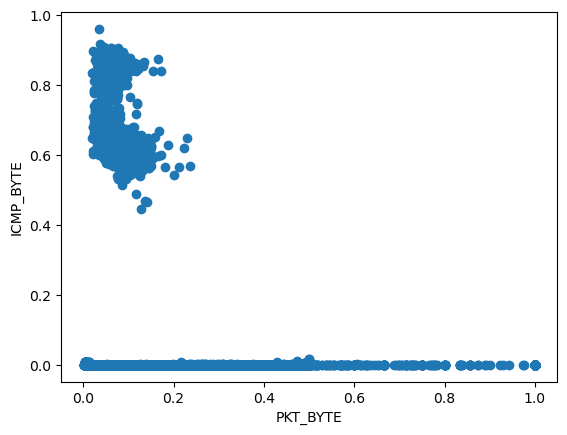

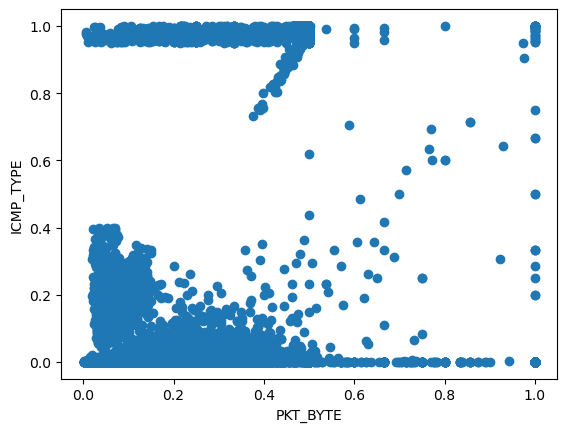

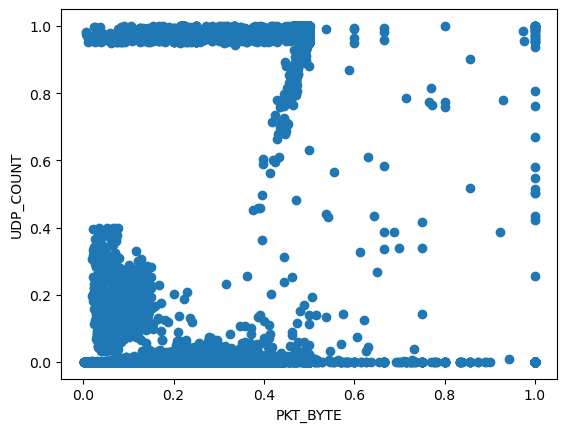

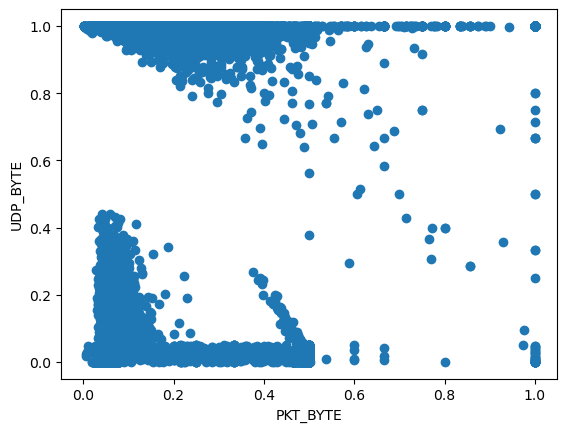

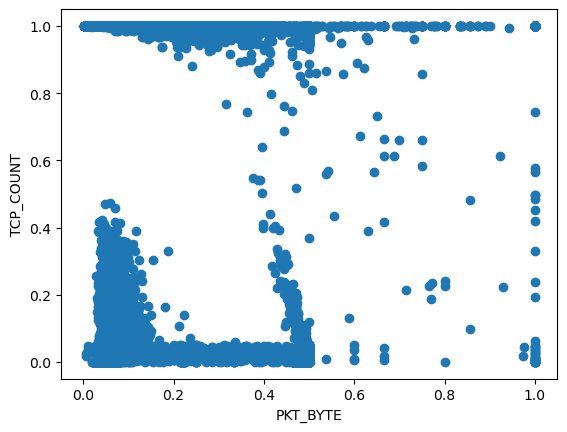

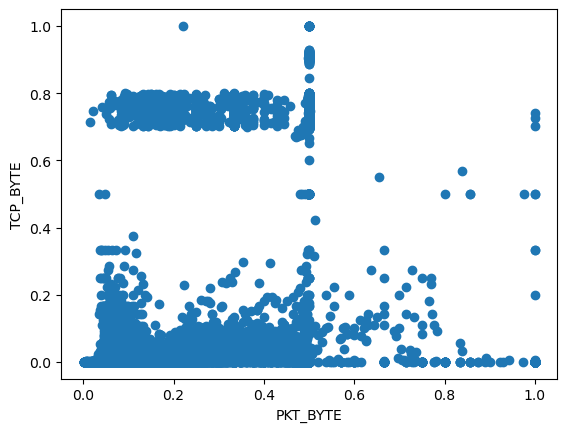

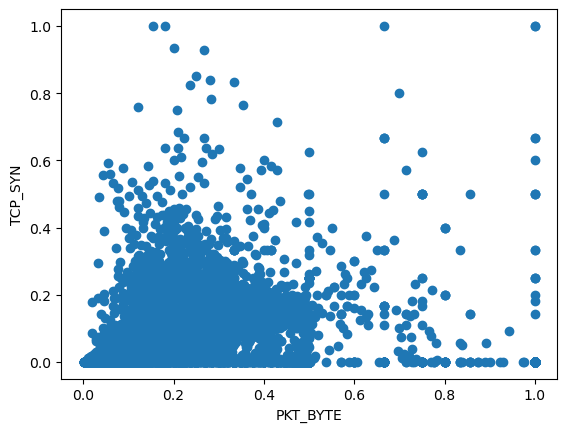

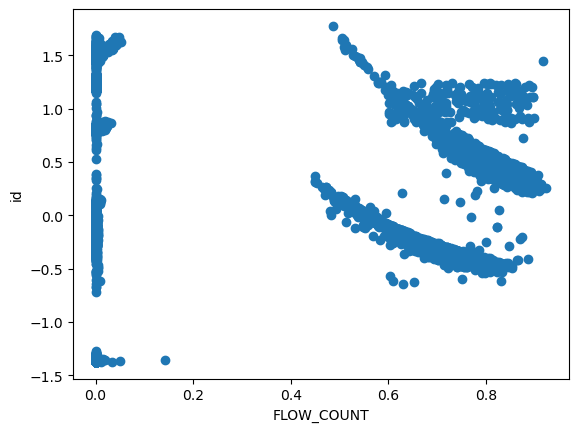

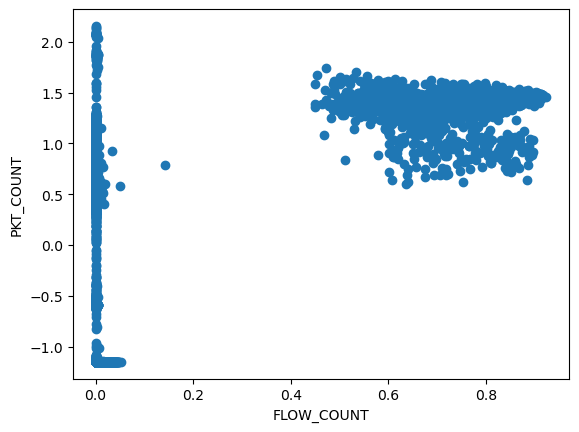

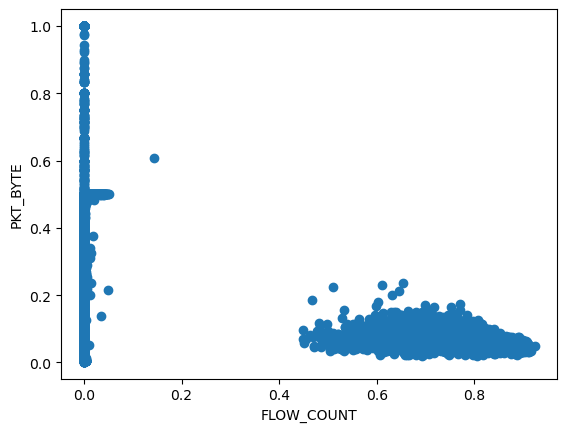

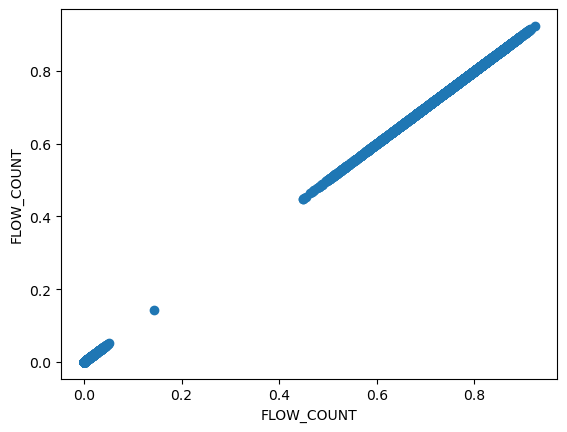

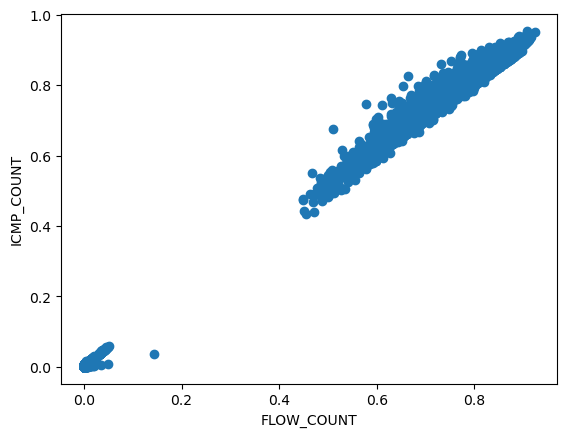

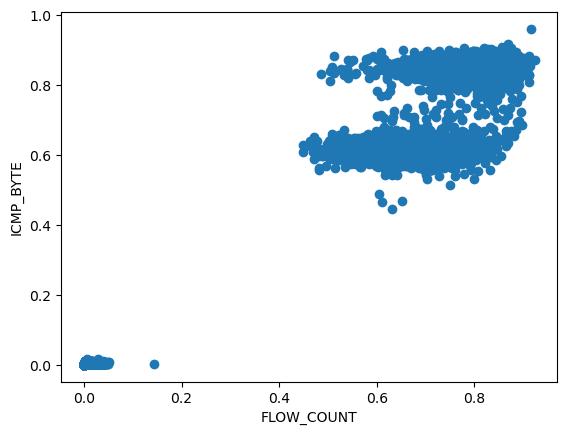

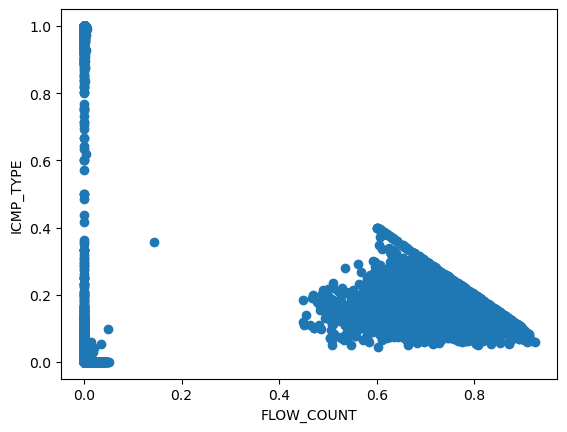

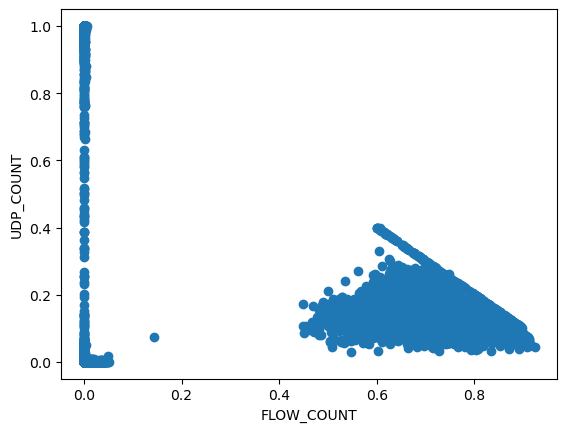

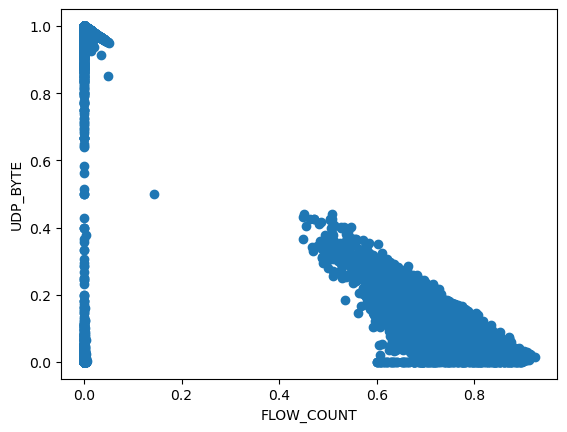

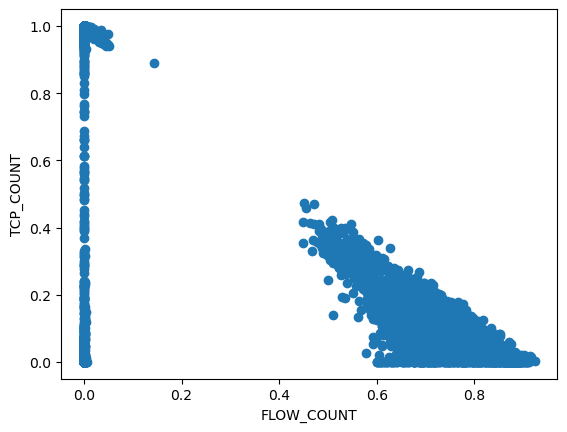

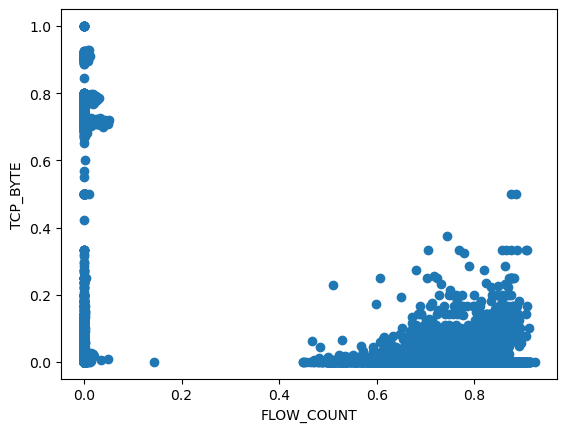

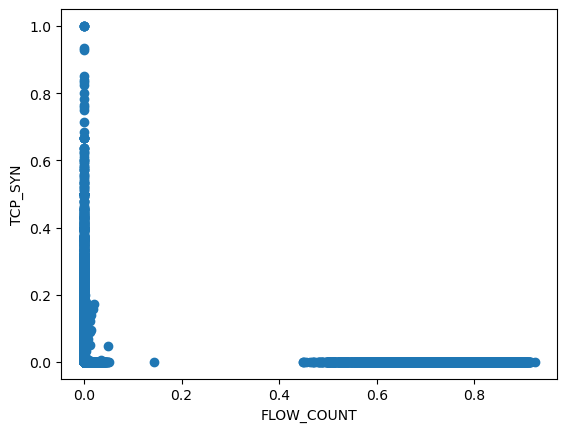

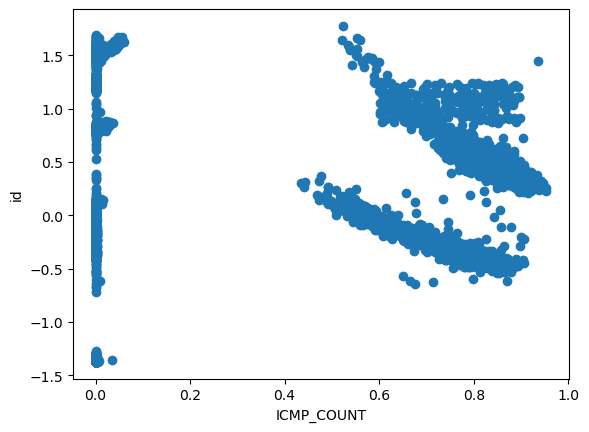

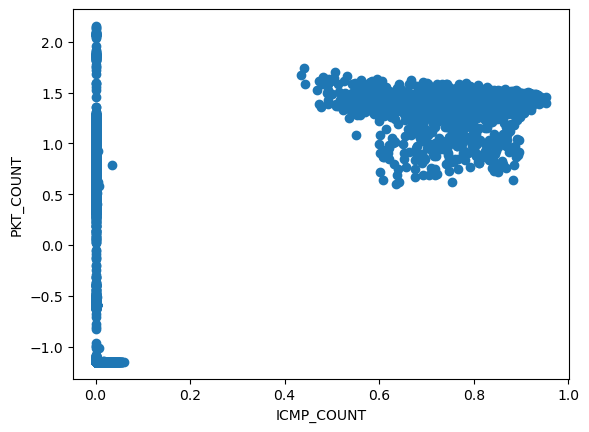

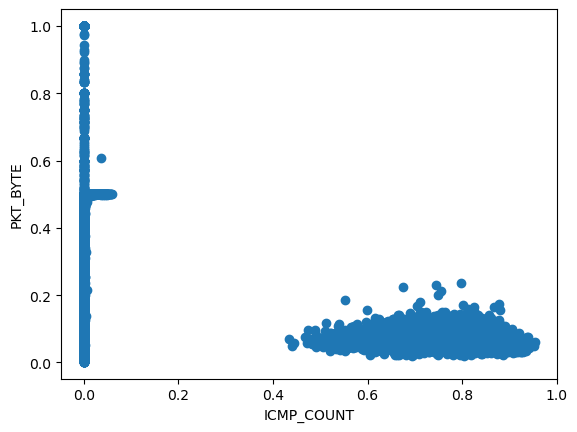

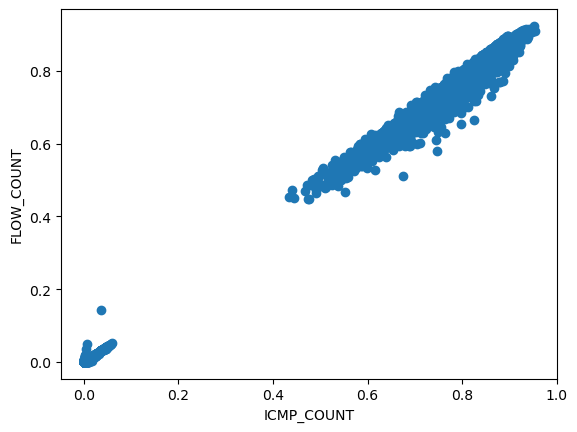

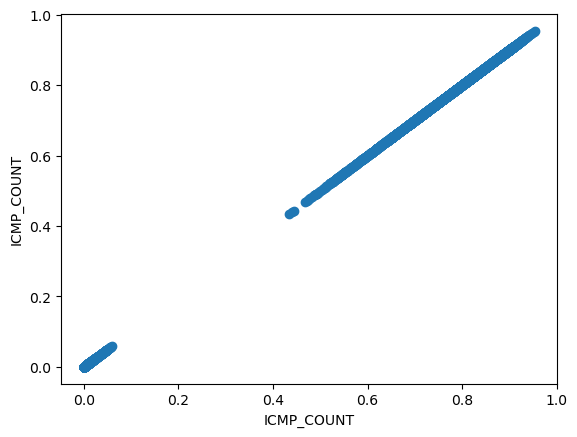

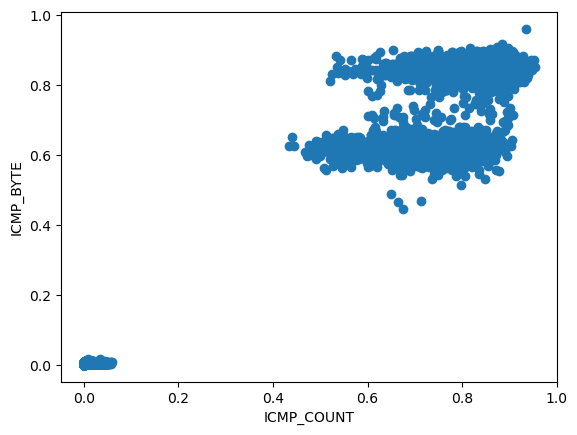

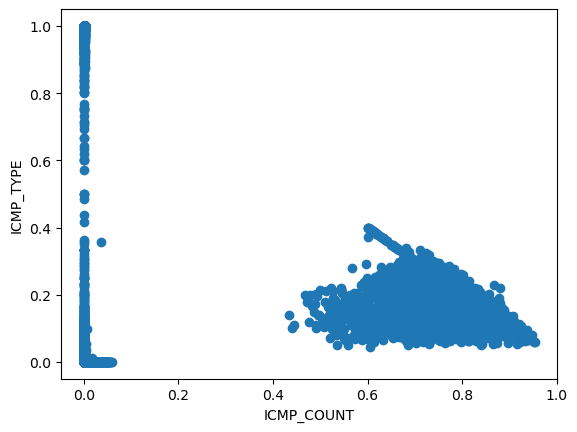

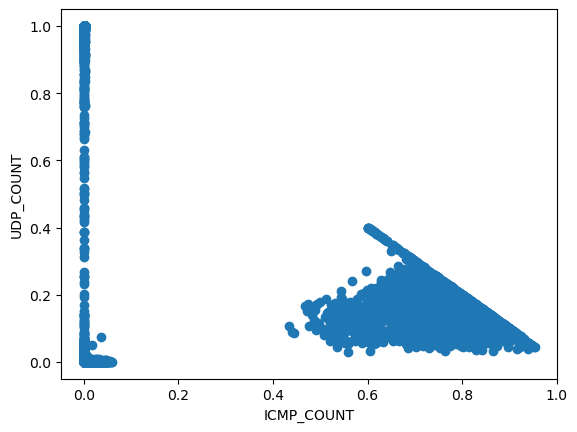

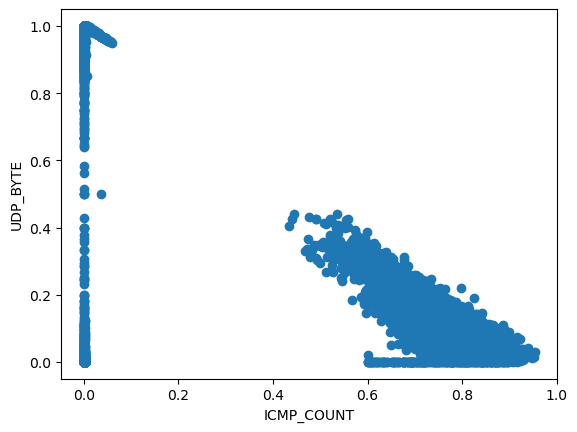

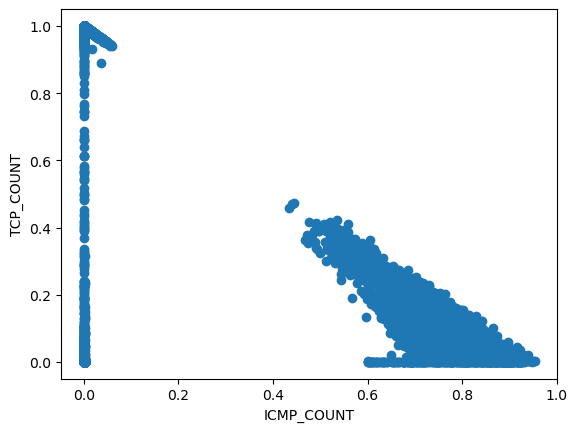

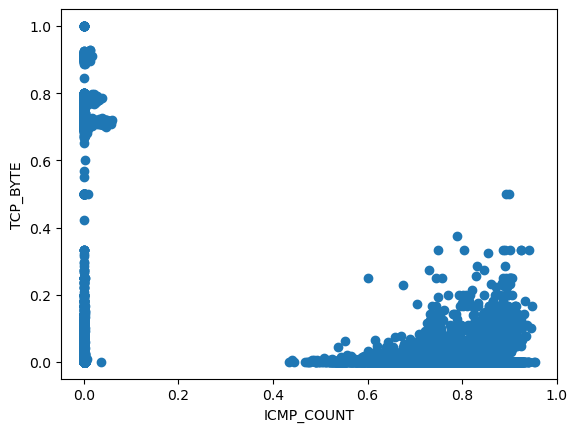

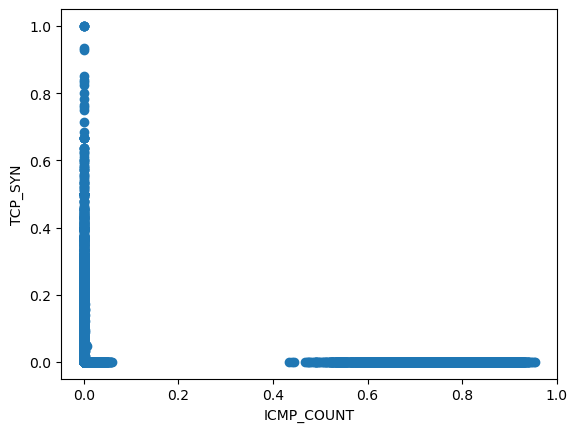

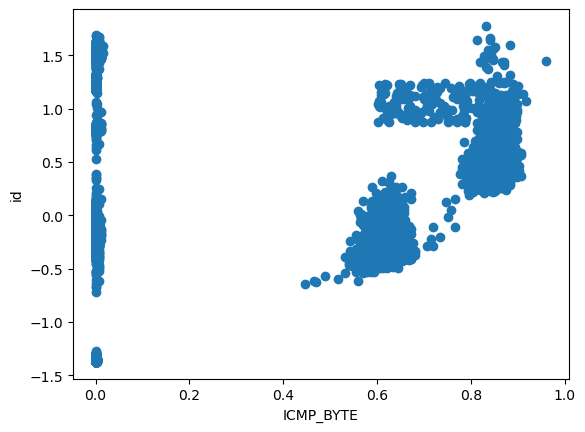

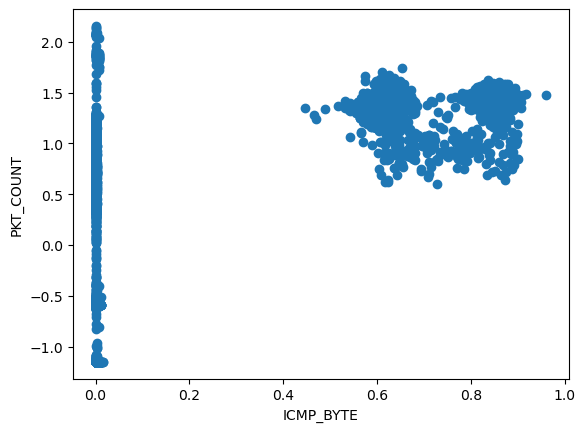

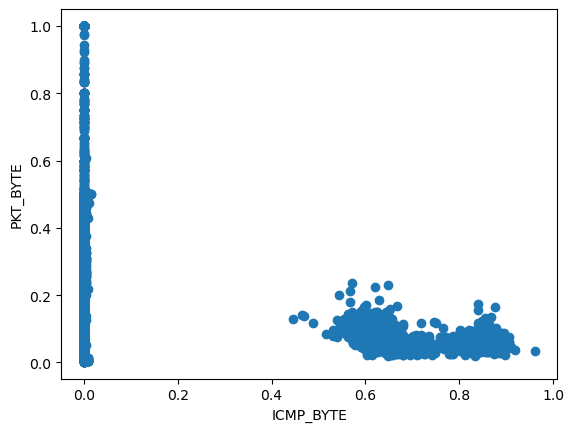

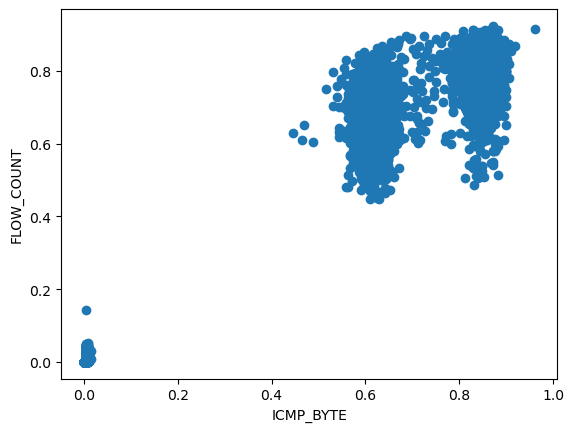

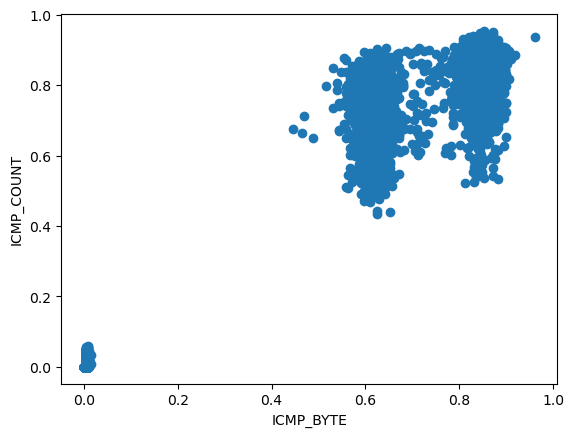

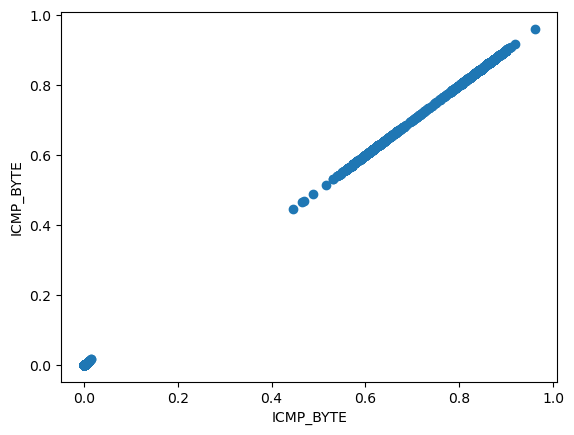

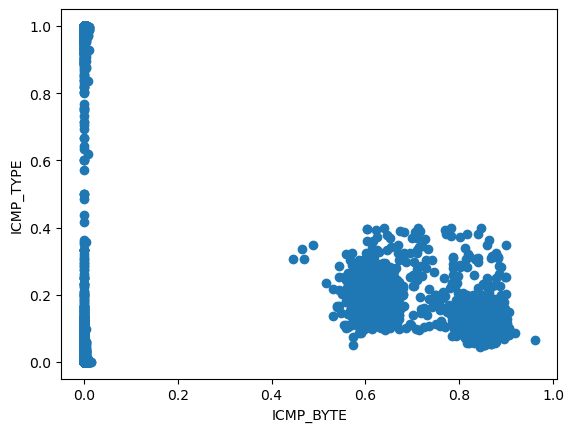

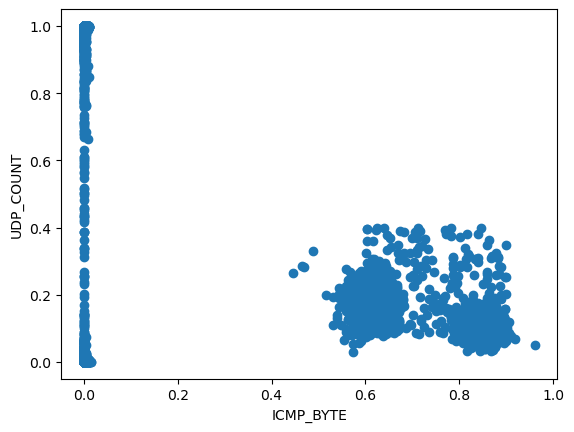

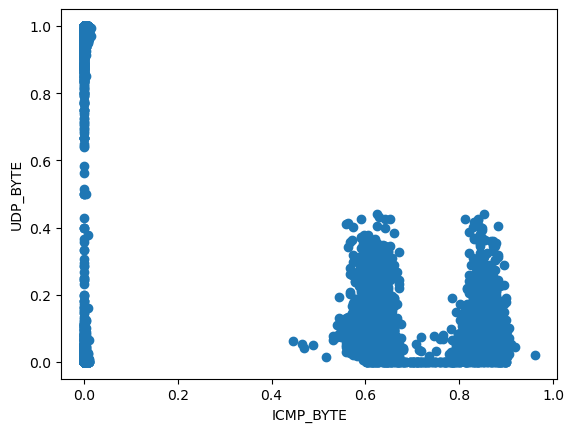

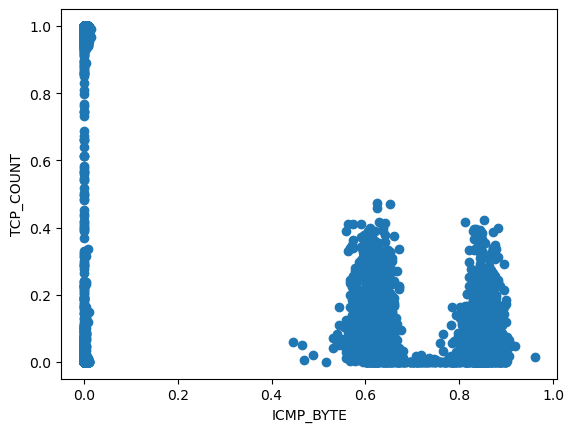

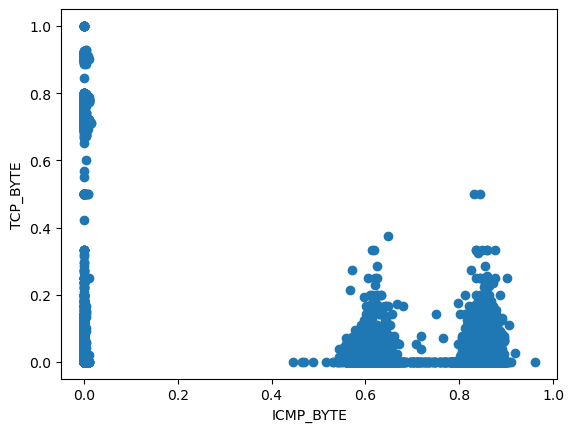

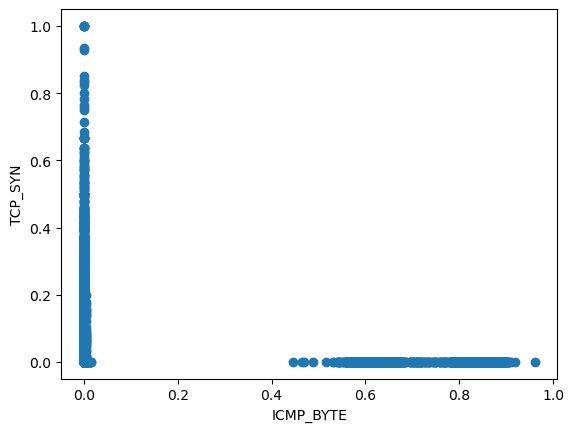

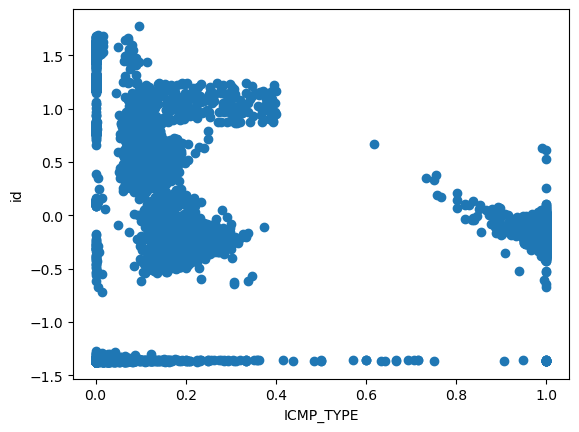

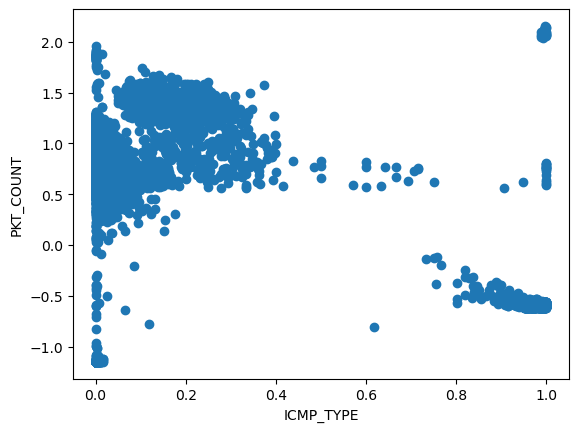

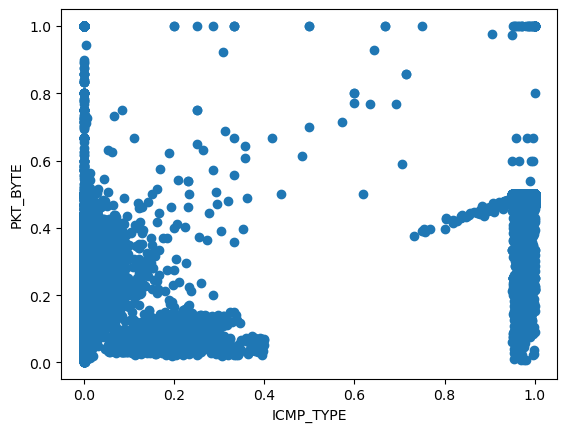

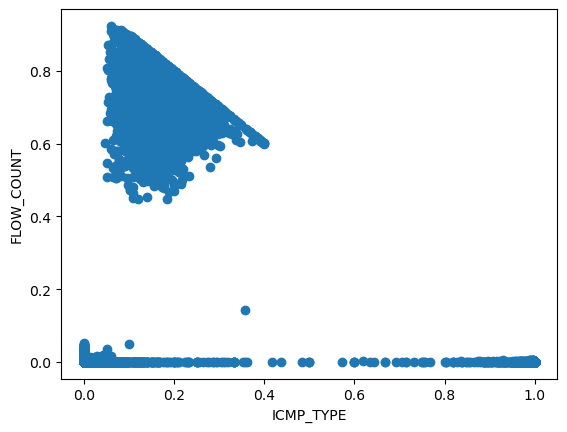

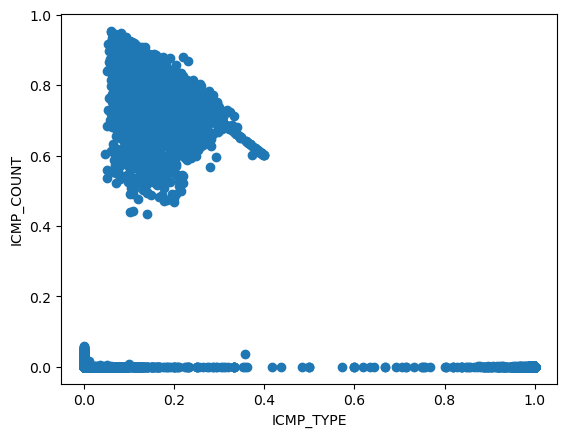

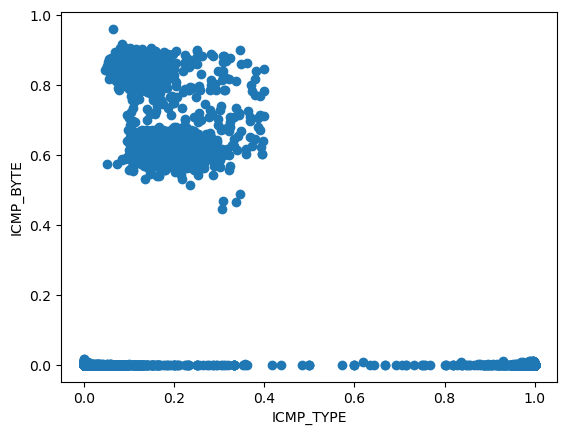

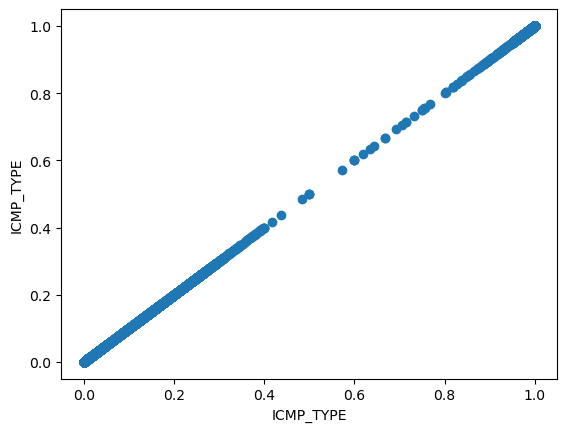

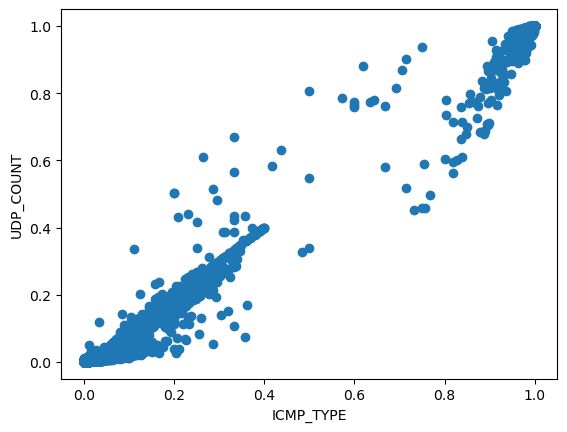

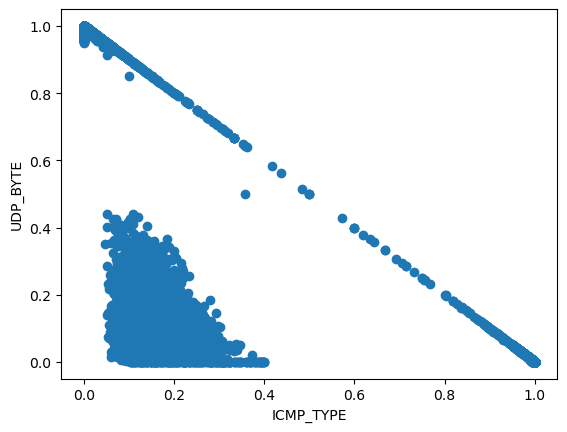

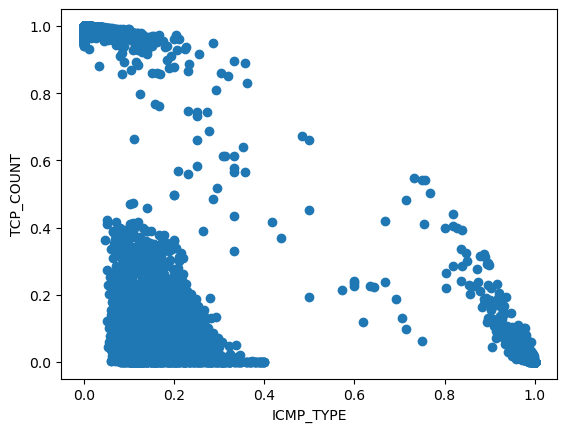

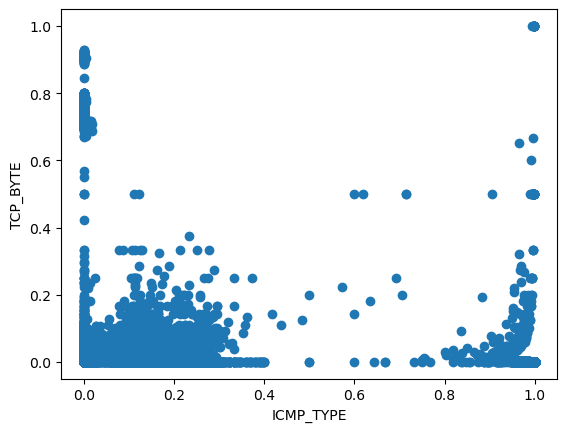

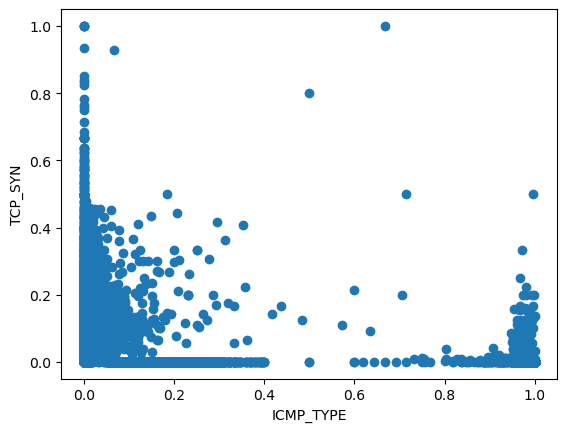

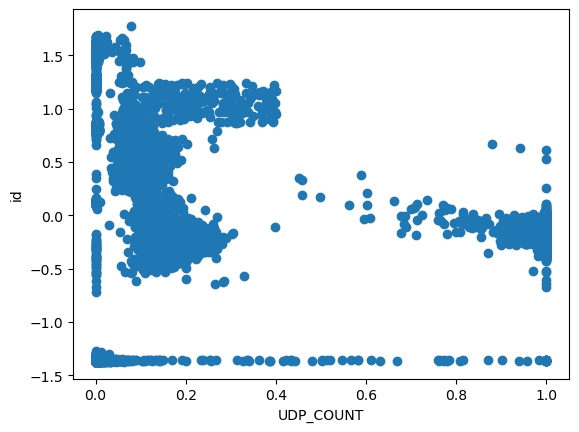

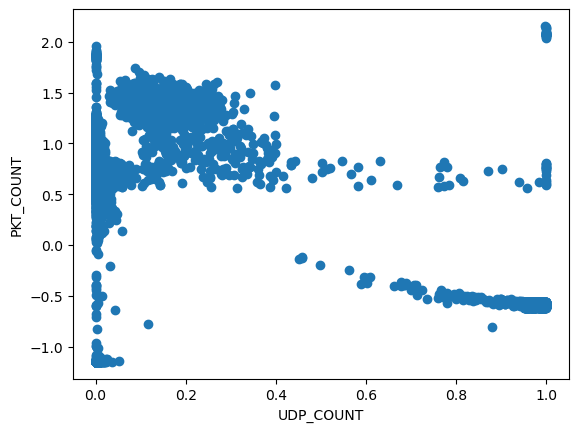

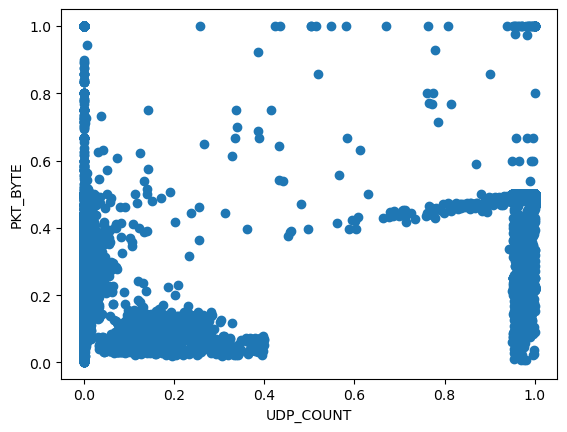

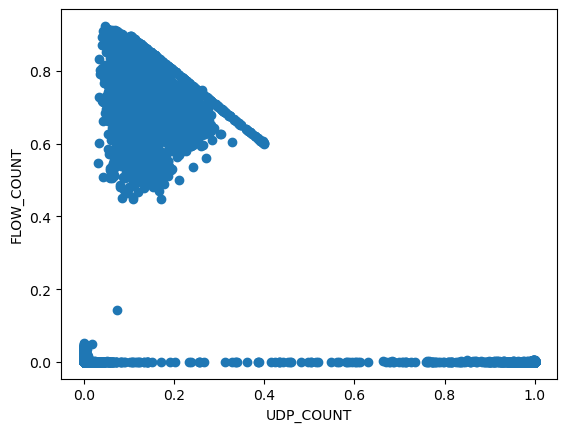

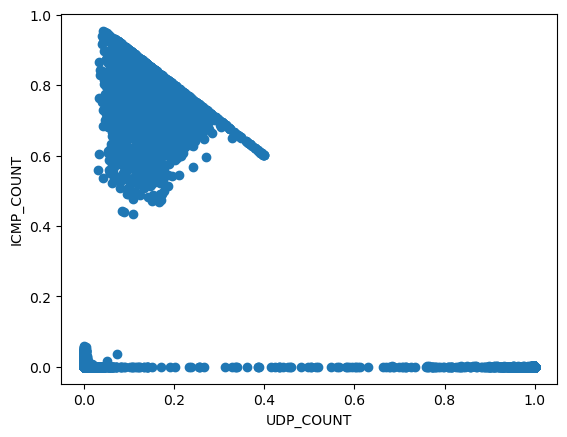

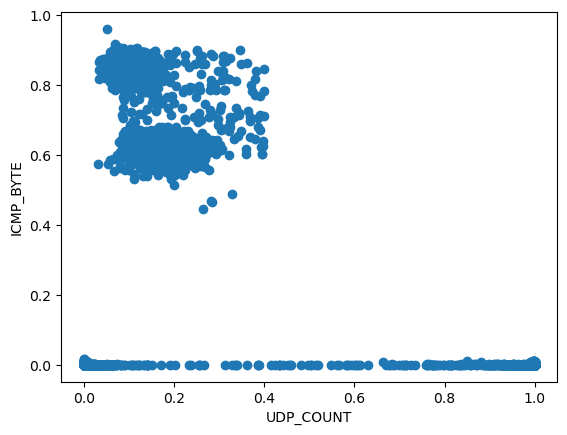

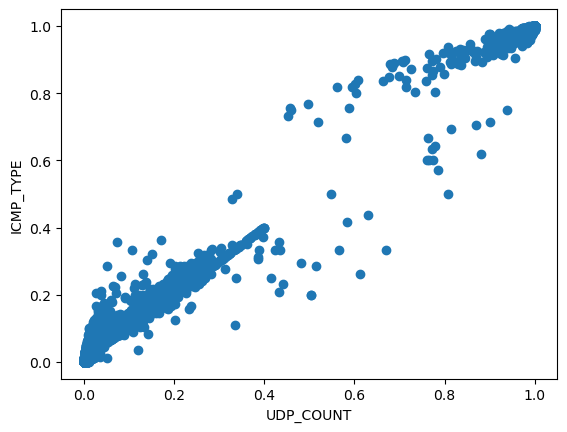

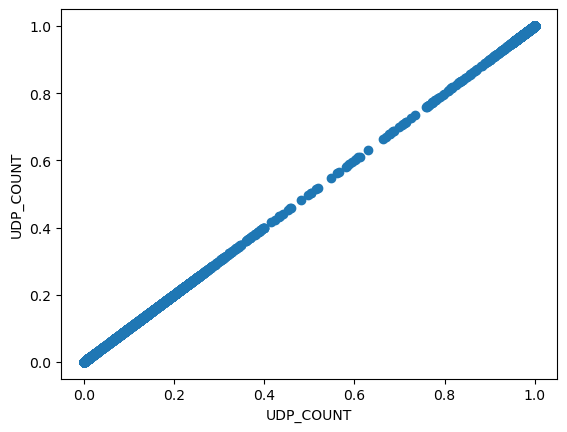

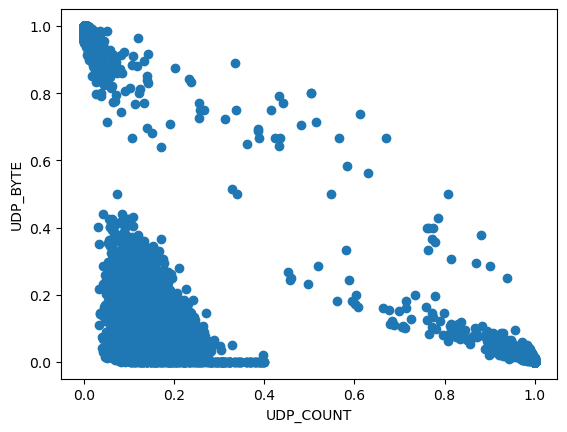

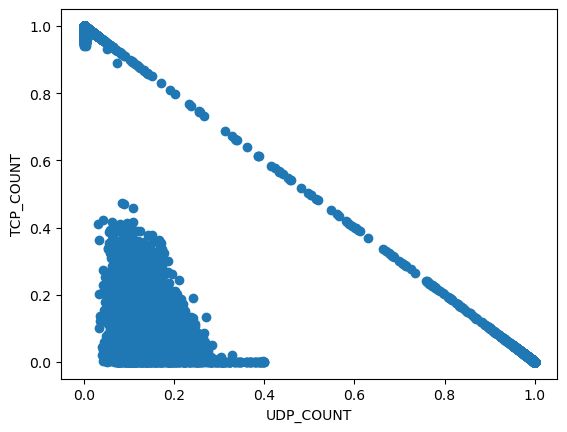

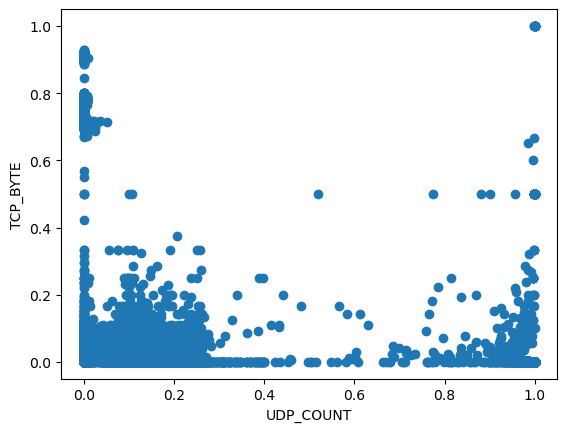

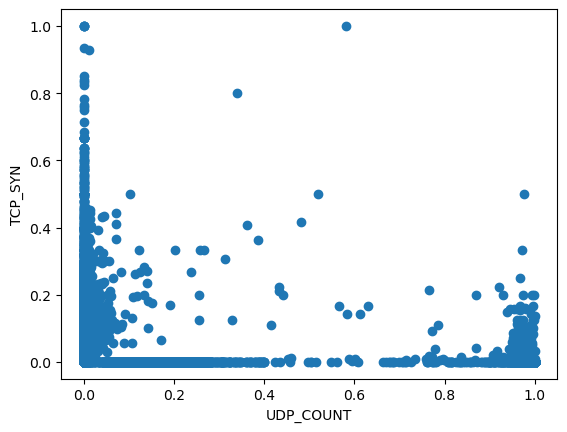

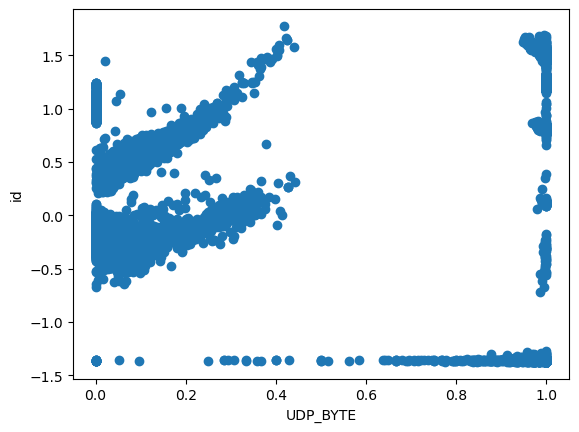

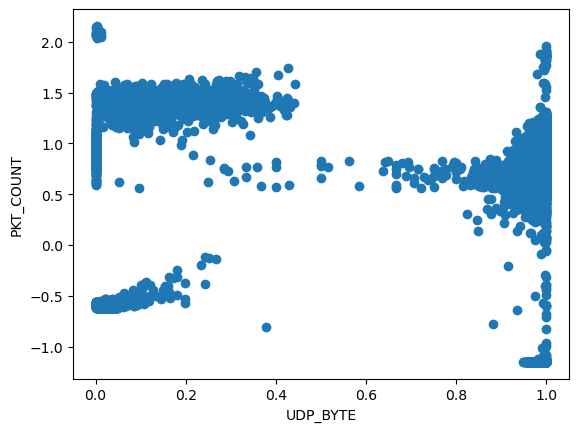

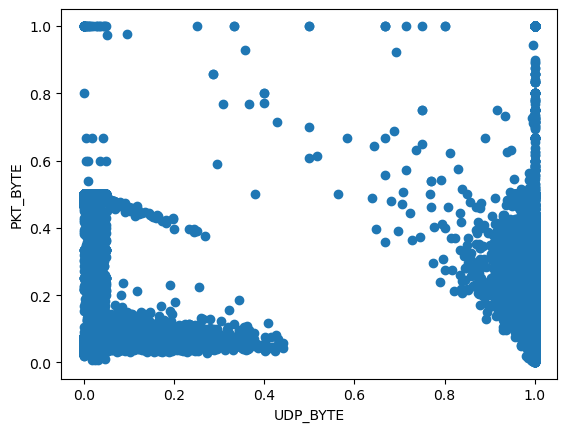

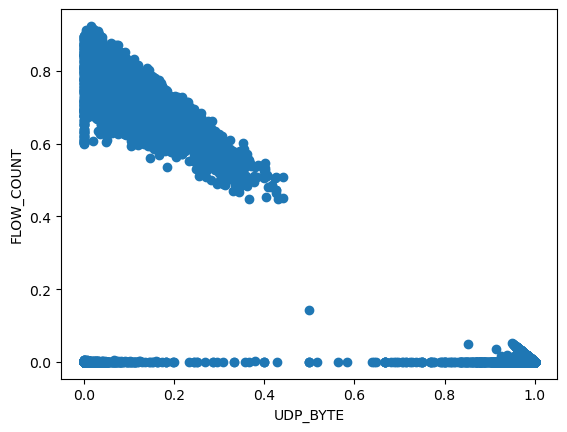

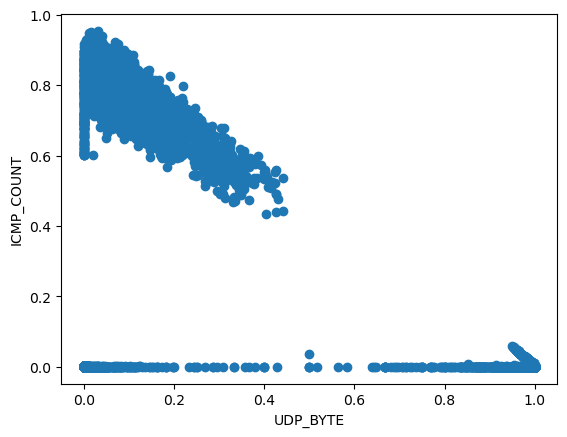

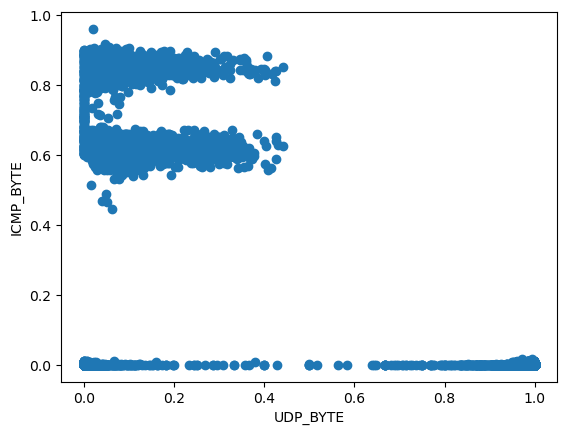

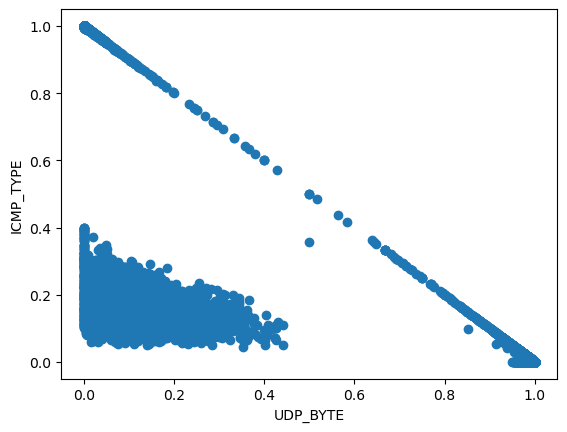

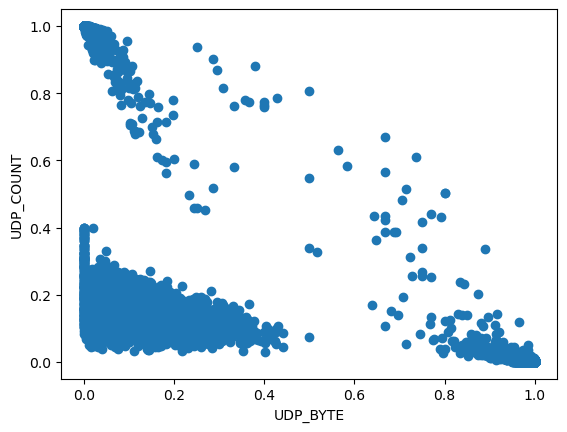

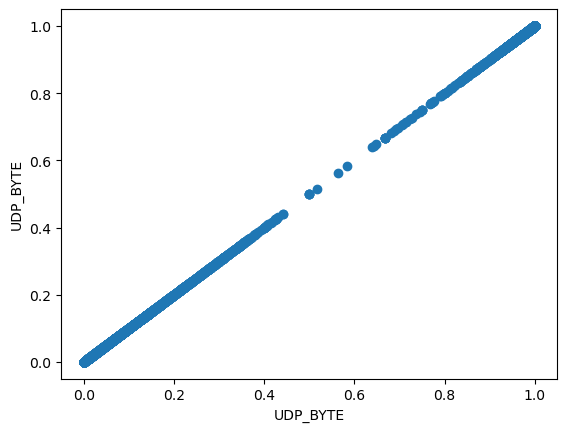

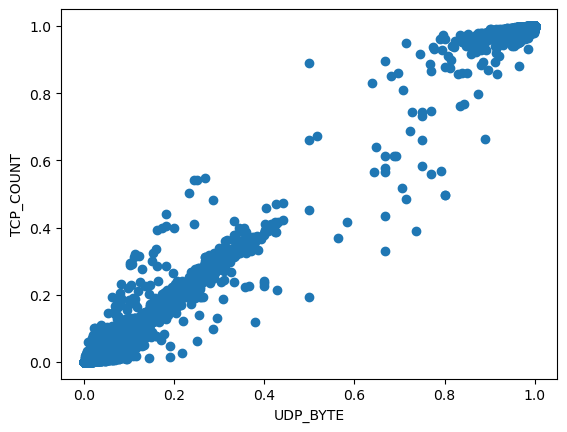

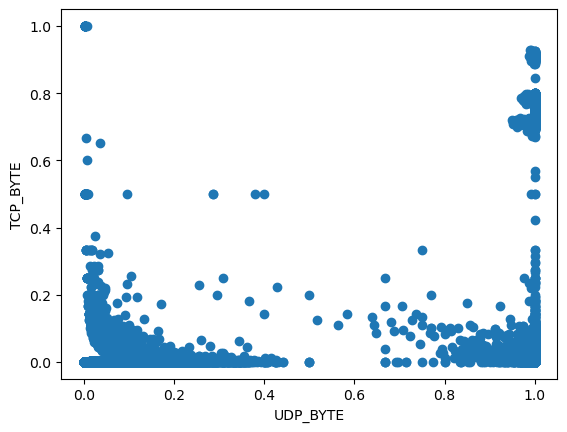

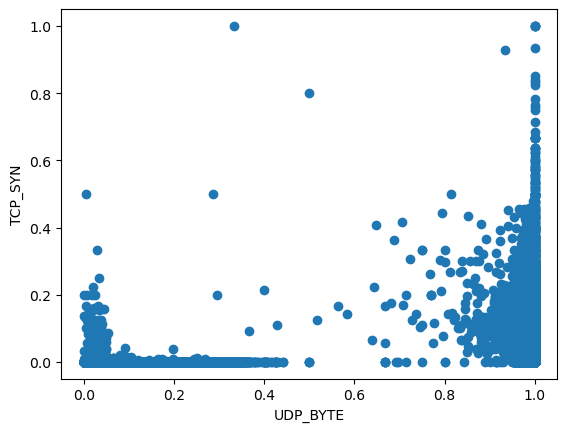

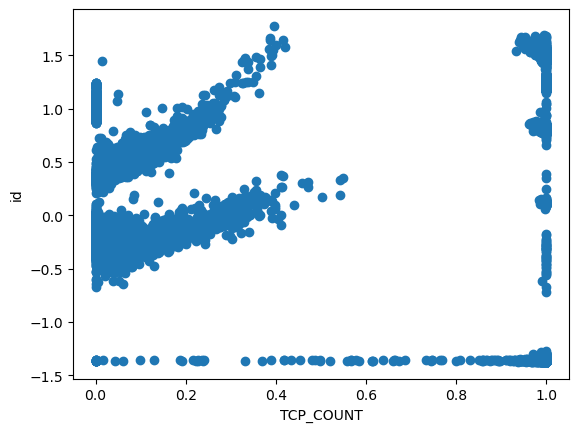

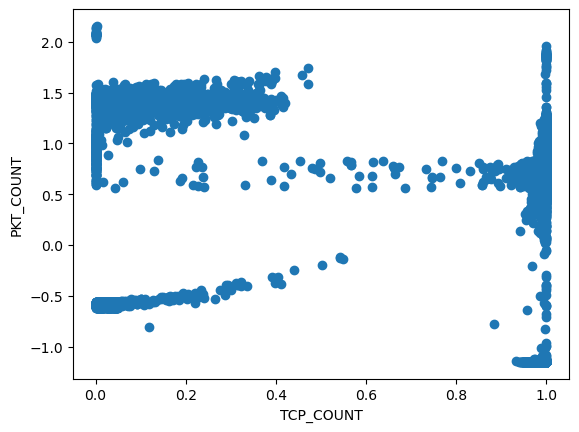

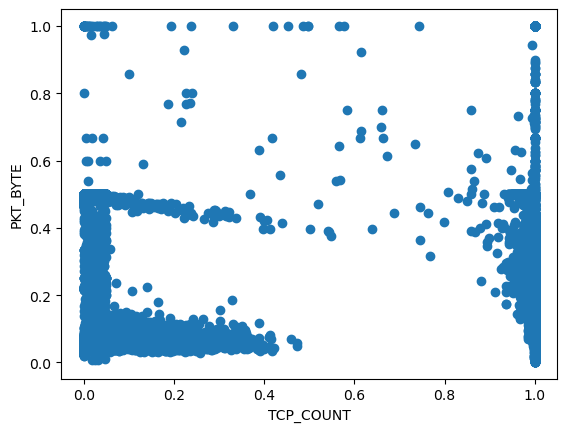

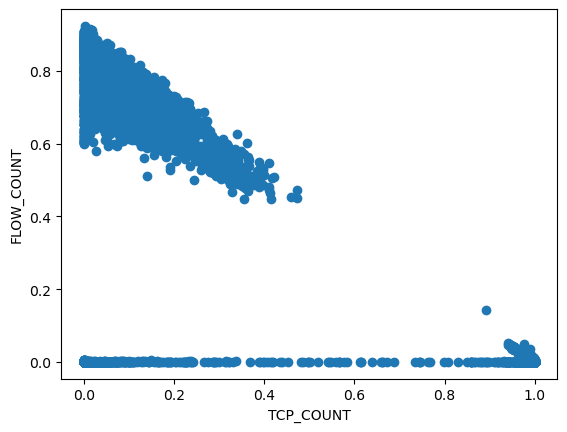

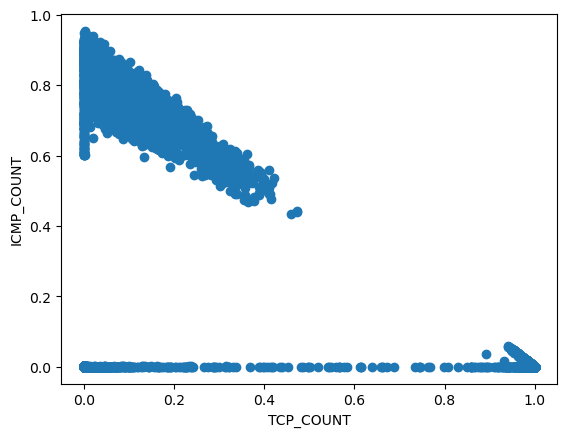

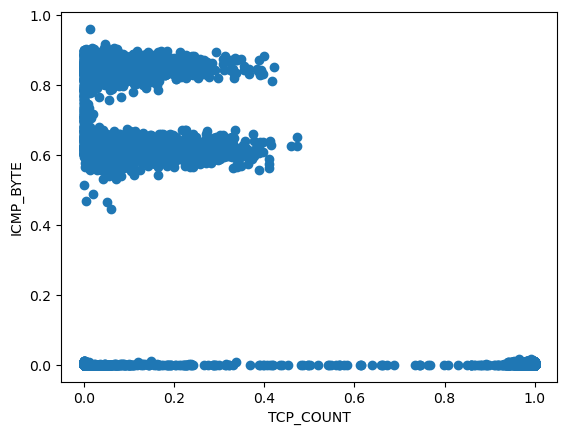

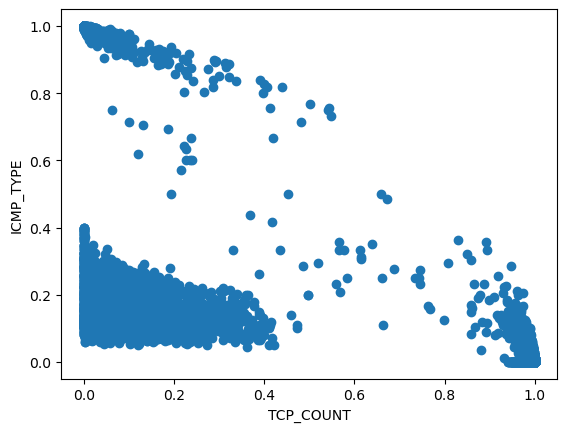

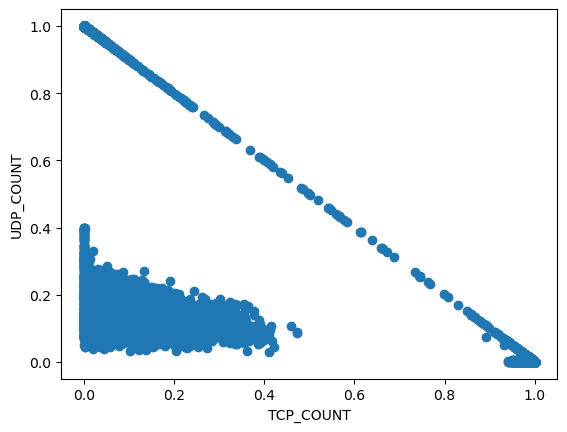

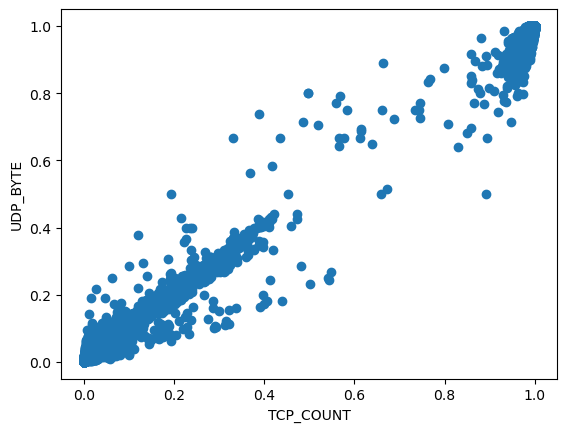

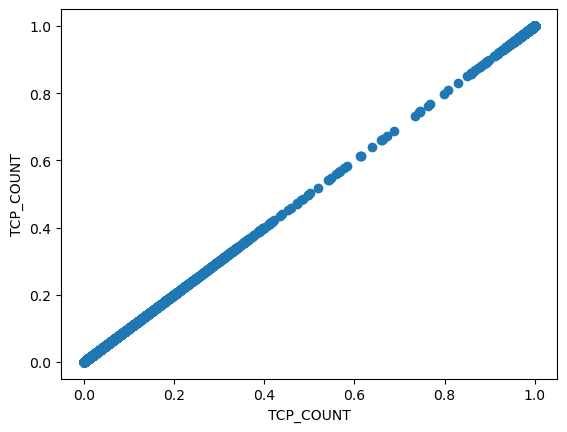

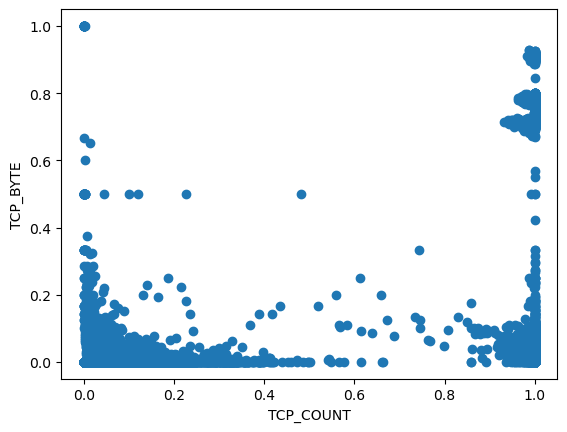

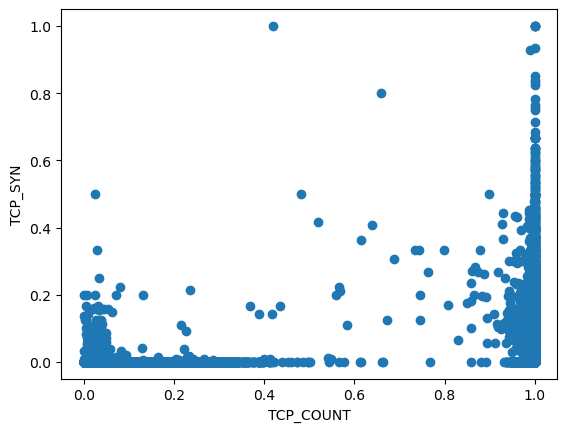

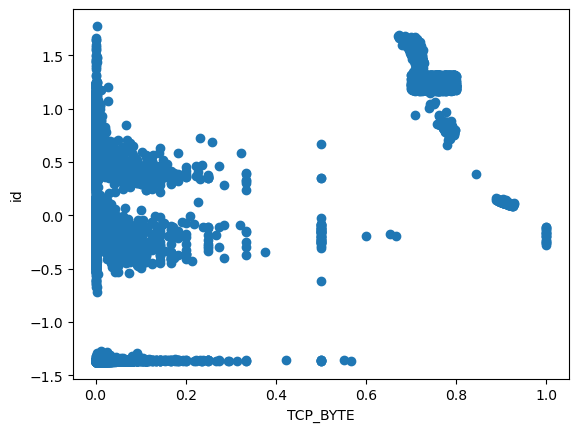

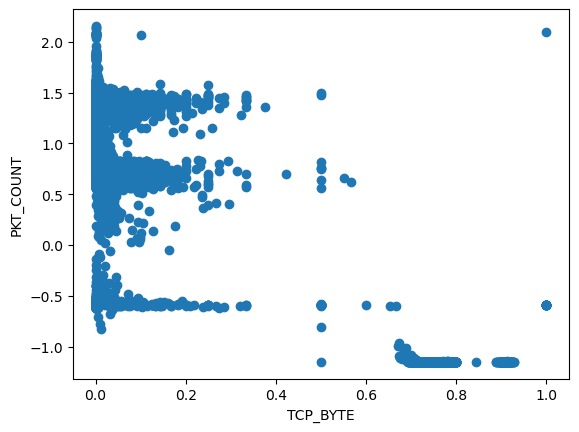

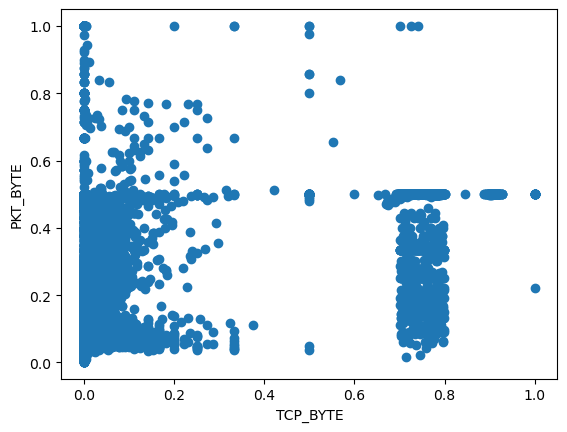

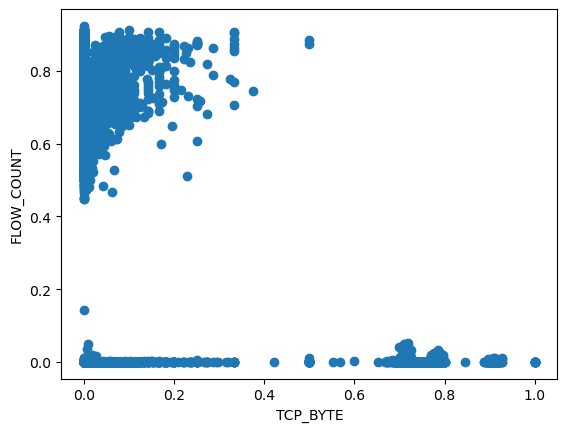

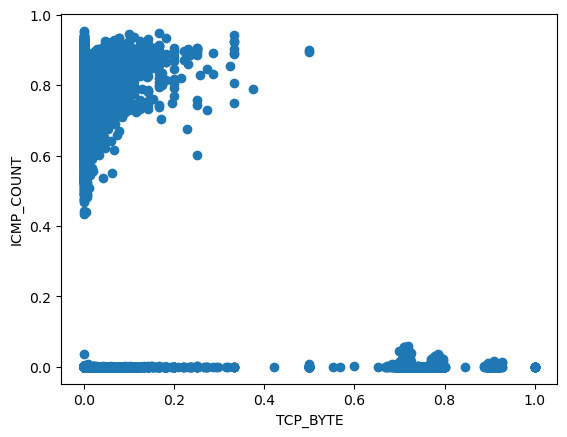

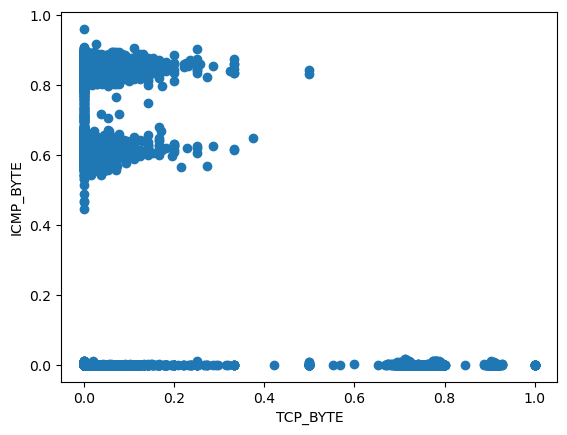

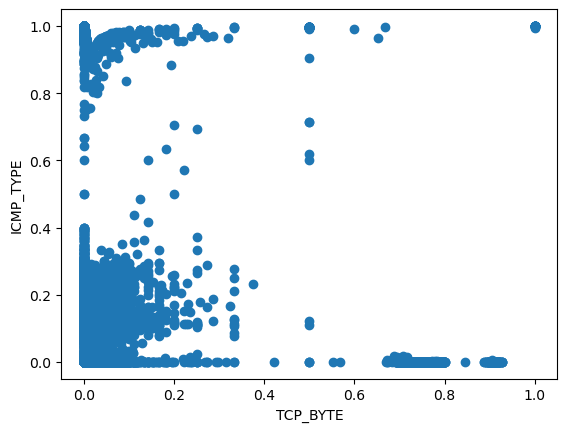

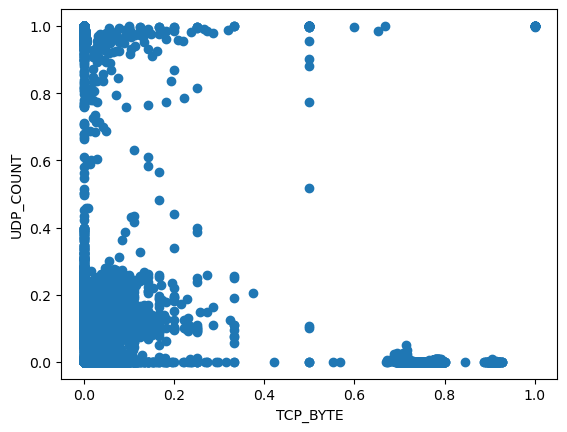

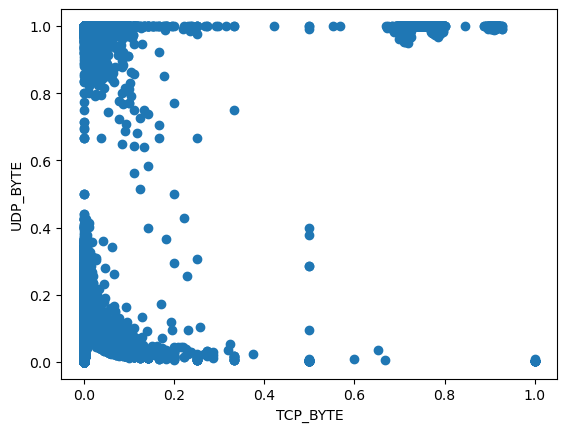

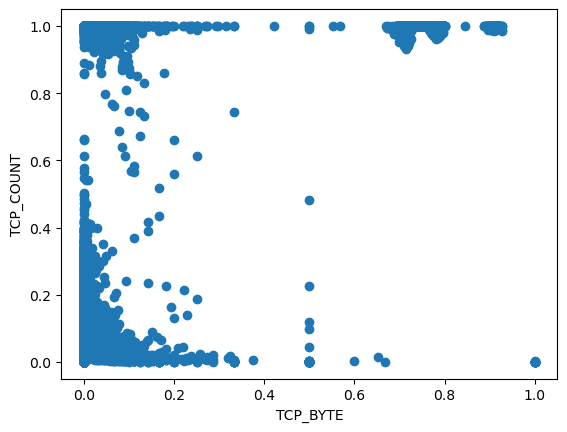

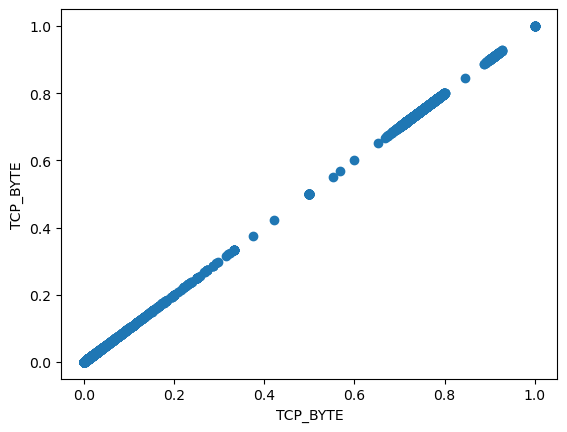

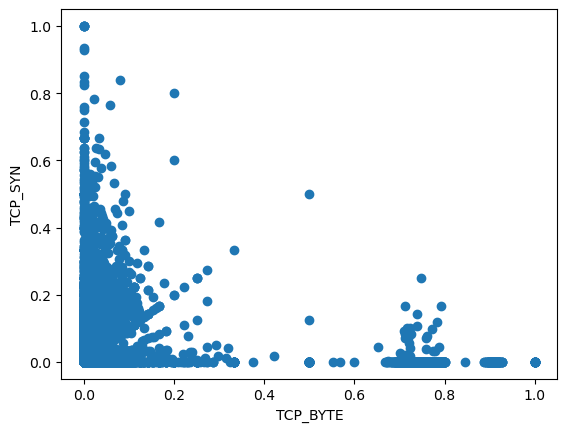

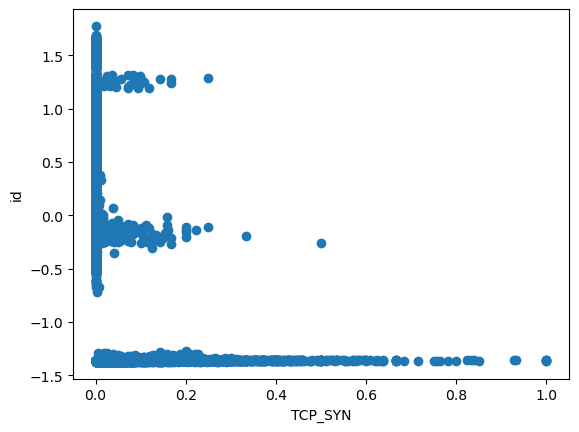

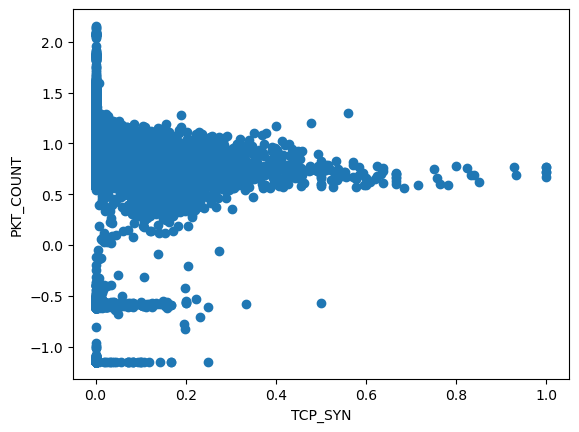

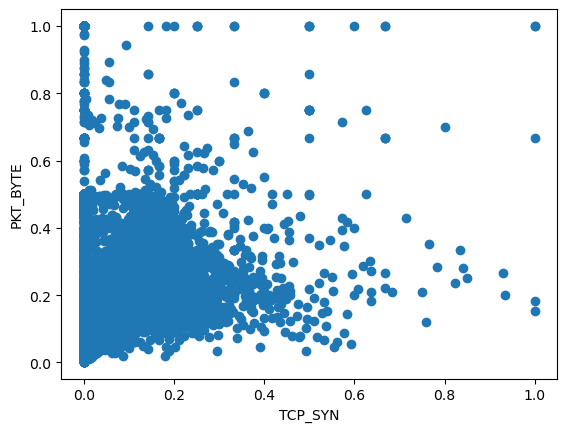

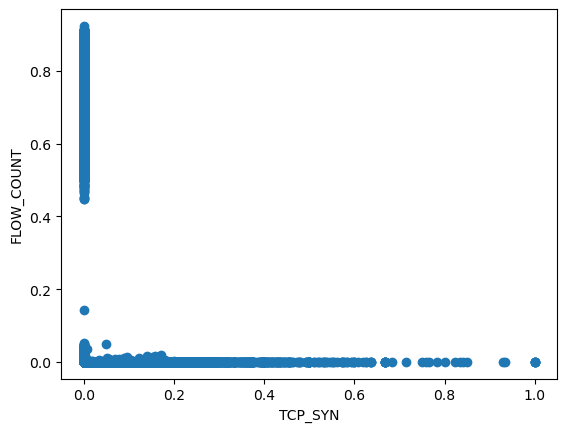

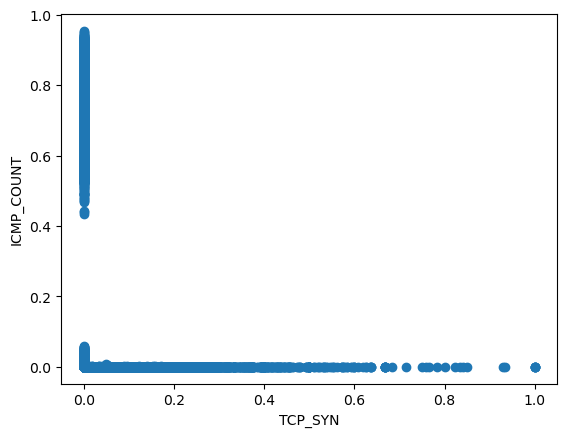

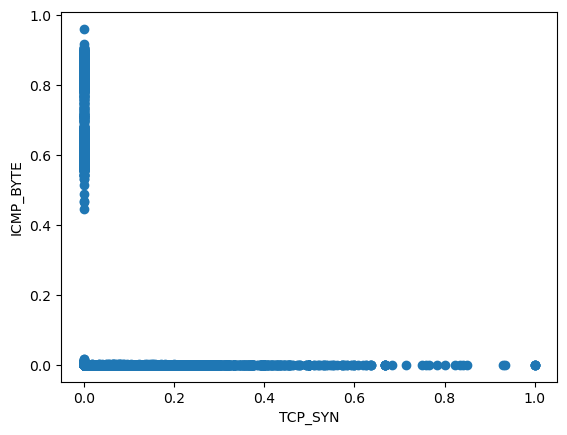

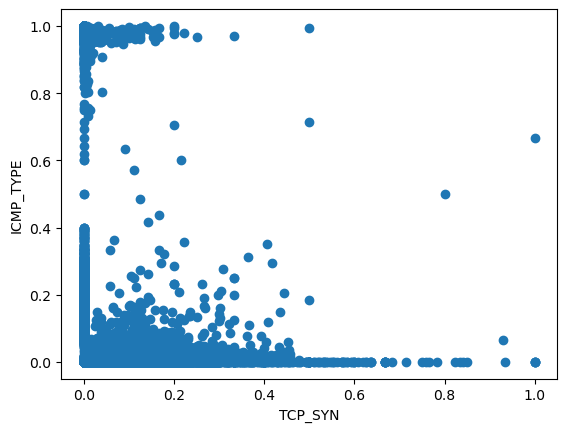

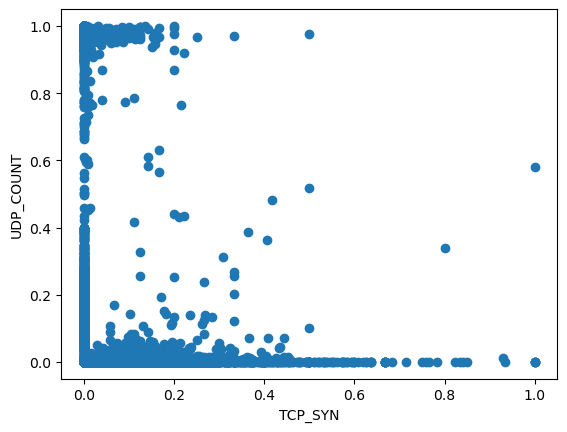

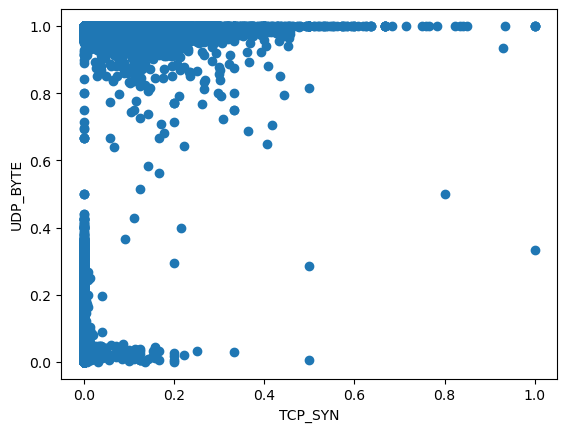

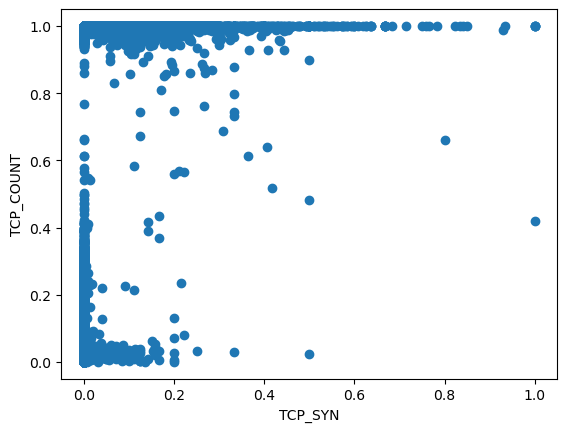

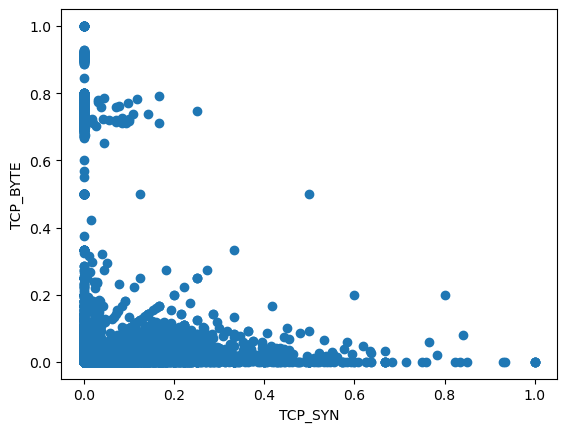

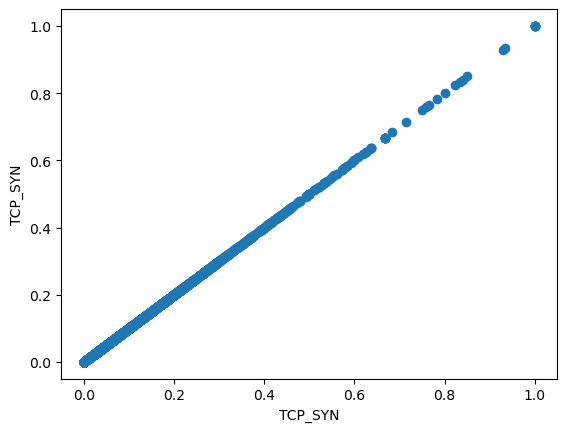

In [19]:
for i in x:
    for j in x:
        plt.xlabel(i)
        plt.ylabel(j)
        plt.scatter(x[i],x[j])
        plt.show()
relevant_col = df[["FLOW_COUNT","ICMP_COUNT","ICMP_BYTE","ICMP_TYPE","ICMP_TYPE","UDP_COUNT","UDP_BYTE"]]